<a href="https://colab.research.google.com/github/vrife/320Final/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How does a country's economic status impact it's football performance in the international stage?

By Nitan Singh, Vladimir Rife, Ehaab Basil

#### SETUP AND DATA WRANGLING ####

Football (soccer) is the most popular sport on Earth, and as such, many countries at many different economic levels compete to be the best. However, some countries are obviously better than others in the sport. This project aims to see if the economy and stability of a country correlates signifigantly with the performance of their national team.

Our hypothesis is that countries with a greater economic performance tend to have better national teams than those that do not. In order to test this, we will use machine learning to analyze each nation's GDP (Gross Domestic Product), GDP-per-captia, and PPP (Purchasing Power Parity), compared to their total FIFA points as the dependent variable. We will only be analyzing this for the year of 2016, as that is the latest year across all of the datasets. 

**Setup**

Below are the packages and libraries we will use for working with our data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
pd.reset_option('^display.', silent=True)

**Data Collection and Curation**

The datasets we will use for this project include one table with each country's GDP, a second table with each country's population, a third table with each country's PPP, and a fourth table with each country's fragility index all acting as independent varaibles. and a final table holding each country's FIFA rankings and total points as our dependent variable. The links to each data source are provided below:

GDP: https://github.com/datasets/gdp/blob/master/data/gdp.csv

Population: https://github.com/datasets/population/blob/master/data/population.csv

PPP: https://github.com/datasets/ppp/blob/master/data/ppp-gdp.csv

FIFA ranking: https://github.com/cnc8/fifa-world-ranking/blob/master/fifa_ranking-2020-12-10.csv


**Why FIFA Total Points?**

We chose the total points listed in the FIFA rankings database to be our measure of each country's performance in football since it is the most widely used metric for ranking national teams in men's soccer. The basic algorithm for computing the total points that produce these rankings is as follows:

The country's total points = (Their previous 12 month averaged match points + Their 36 month averaged match points before that)

Furthermore, the point system for each match is as follows:

Points from a single match = M x I x T x C

M = 3, 1, 0, 1, or 2 depending on if the country won, drew, lost, lost on penalties, or won on penalties respectively

I = 1, 2.5, 3, or 4 depending on if the match was a friendly, world-cup/confederation-level qualifier, confederation-level final, or world cup final game respectively

T = (200 - the opposing team's FIFA rank)

C = 1, 0.99, or 0.85 depending on if the opposing team is in the CONMEBOL, UEFA, or AFC/CAF/OFC/CONCACAF confederations respectively

More information about this algorithm exists at: https://www.goal.com/en-us/news/fifa-world-ranking-how-it-is-calculated-what-it-is-used-for/16w60sntgv7x61a6q08b7ooi0p


**Why GDP?**

We chose GDP (Gross Domestic Product) as a metric for a country's wealth since it is a direct measurement of a country's monetary productivity and consumption. The basic algorithm for computing GDP is as follows:

The country's GDP = C + G + I + NX 

C = total domestic consumer spending or private consumption expenditure

G = total government consumption expenditure and gross investment carried out under the government’s name

I = all capital expenditures or private domestic investments

NX = (country's total export costs - country's total import costs)

More information about this algorithm exists at: https://www.analyticssteps.com/blogs/introduction-gross-domestic-product-gdp

**Why GDP Per Capita?**

We chose GDP per capita as a metric for a country's wealth since it is a measurement of a country's monetary productivity and consumption as opposed to its population. The basic algorithm for computing GDP per capita is as follows:

The country's GDP Per Capita = (The country's GDP / The country's population)

**Why PPP?**

PPP (Purchasing Power Parity) is the measure of how accessible and affordable goods are in a country with one standard unit of their currency (Ex: USD, Euro, Russian Ruble, etc). We chose this as a metric for a country's wealth since it is a good measure of how financially comfortable it is for citizens to exist in their country of origin. PPP can be calculated using the following formula:

The country's PPP = Cost of goods in the country / Cost of goods in another country (usually the US)

More information about this algorithm exists at: https://www.ig.com/en/trading-strategies/what-is-purchasing-power-parity--ppp---191106

**Getting the Data**

Read the data from each of the github tables into a dataframe. We are only interested in the rows concerning individual countries, so we will delete any row with information about a country grouping (Ex: "Arab World"). We also need to drop any unecessary columns or rename any columns that might conflict with the other tables we will merge that table with.

In [ ]:
#Read in the country GDP data from the github database, group them by year,
#drop all the irrelevant rows and columns, replace the Value label with GDP, and
#print the resulting gdp_df head
gdp_df = pd.read_csv('https://github.com/datasets/gdp/raw/master/data/gdp.csv')
gdp_df.groupby('Year')
gdp_df = gdp_df.drop(labels=range(0, 2306), axis=0)
gdp_df = gdp_df.drop(columns='Country Code')
gdp_df.rename(columns={'Value':'GDP'}, inplace=True)
gdp_df.head()

Country Name  Year           GDP
2306  Afghanistan  1960  5.377778e+08
2307  Afghanistan  1961  5.488889e+08
2308  Afghanistan  1962  5.466667e+08
2309  Afghanistan  1963  7.511112e+08
2310  Afghanistan  1964  8.000000e+08

In [ ]:
#Read in the country population data from the github database, group them by year,

population_df = pd.read_csv('https://github.com/datasets/population/raw/master/data/population.csv')
population_df.groupby('Year')
#drop all the irrelevant rows and columns, replace the Value label with population,
#and print the resulting population_df head
population_df = population_df.drop(labels=range(0, 2714), axis=0)
population_df = population_df.drop(columns='Country Code')
population_df.rename(columns={'Value':'Population'}, inplace=True)
population_df.head()

Country Name  Year  Population
2714  Afghanistan  1960     8996973
2715  Afghanistan  1961     9169410
2716  Afghanistan  1962     9351441
2717  Afghanistan  1963     9543205
2718  Afghanistan  1964     9744781

In [ ]:
#Read in the country PPP data from the github database, group them by year,

ppp_df = pd.read_csv('https://github.com/datasets/ppp/raw/master/data/ppp-gdp.csv')
#drop all the irrelevant columns, replace the Value label with population,
#and print the resulting ppp_df head
ppp_df = ppp_df.drop(columns='Country ID')
ppp_df.rename(columns={'Country':'Country Name'}, inplace=True)
ppp_df.head()

Country Name  Year        PPP
0        Kenya  2019  40.975445
1        Kenya  2018  40.179628
2        Kenya  2017  40.184937
3        Kenya  2016  39.384956
4        Kenya  2015  39.040478

In [ ]:
#Read in the FIFA ranking data from the github database, sort it by the country
#name, make a Year column including only the year from rank_date, rename the 
#column country_full to be Country Name
FIFA_df = pd.read_csv(r"https://raw.githubusercontent.com/cnc8/fifa-world-ranking/master/fifa_ranking-2020-12-10.csv")
FIFA_df.sort_values("country_full")
FIFA_df['Year'] = FIFA_df['rank_date'].apply(lambda x: x[:4])
FIFA_df = FIFA_df.rename(columns={"country_full": "Country Name"})
#Sort the dataframe by year, drop the rank_date column, and accomidate the table
#to be able to hold the US
FIFA_df.sort_values('Year')
FIFA_df = FIFA_df.drop(columns='rank_date')
FIFA_df.loc[(FIFA_df['Country Name'] == 'USA'),'Country Name']='United States'



In [ ]:
#Some countries have different names on different databases, so we should rename them so they have 
#consistent names, since we will use the country names to merge later on 
FIFA_df.loc[(FIFA_df['Country Name'] == 'USA'),'Country Name']='United States'

gdp_df.loc[(gdp_df['Country Name'] == 'Congo, Dem. Rep.'),'Country Name']='Congo DR'
gdp_df.loc[(gdp_df['Country Name'] == 'Congo, Rep.'),'Country Name']='Congo'

ppp_df.loc[(ppp_df['Country Name'] == 'Congo, Dem. Rep.'),'Country Name']='Congo DR'
ppp_df.loc[(ppp_df['Country Name'] == 'Congo, Rep.'),'Country Name']='Congo'

population_df.loc[(population_df['Country Name'] == 'Congo, Dem. Rep.'),'Country Name']='Congo DR'
population_df.loc[(population_df['Country Name'] == 'Congo, Rep.'),'Country Name']='Congo'

#Set proper types for year columns
FIFA_df['Year'] = FIFA_df['Year'].astype(int)
gdp_df['Year'] = gdp_df['Year'].astype(int)


In [ ]:
#merge FIFA dataframe and GDP dataframe into one dataframe, called master_df. This will be the main dataframe that we reference
#for the remainder of the tutorial
#We will always do an inner merge, so we dont have any rows that dont have certain column values
master_df = FIFA_df.merge(gdp_df, how='inner', on=['Country Name', 'Year'])
master_df = master_df.sort_values(['Country Name', 'Year'])
master_df.head()

id  rank Country Name  ... confederation  Year           GDP
17586  20000   204  Afghanistan  ...           AFC  2003  4.583644e+09
17587  20000   203  Afghanistan  ...           AFC  2003  4.583644e+09
17588  20000   198  Afghanistan  ...           AFC  2003  4.583644e+09
17589  20000   198  Afghanistan  ...           AFC  2003  4.583644e+09
17590  20000   199  Afghanistan  ...           AFC  2003  4.583644e+09

[5 rows x 10 columns]

In [ ]:
#merge population dataframe into master_df
master_df = master_df.merge(population_df, how='inner', on=['Country Name', 'Year'])
master_df.head()

id  rank Country Name  ...  Year           GDP  Population
0  20000   204  Afghanistan  ...  2003  4.583644e+09    23680871
1  20000   203  Afghanistan  ...  2003  4.583644e+09    23680871
2  20000   198  Afghanistan  ...  2003  4.583644e+09    23680871
3  20000   198  Afghanistan  ...  2003  4.583644e+09    23680871
4  20000   199  Afghanistan  ...  2003  4.583644e+09    23680871

[5 rows x 11 columns]

In [ ]:
#merge PPP dataframe into master_df

master_df = master_df.merge(ppp_df, how='inner', on=['Country Name', 'Year'])
master_df.head()

id  rank Country Name  ...           GDP  Population        PPP
0  20000   204  Afghanistan  ...  4.583644e+09    23680871  10.074357
1  20000   203  Afghanistan  ...  4.583644e+09    23680871  10.074357
2  20000   198  Afghanistan  ...  4.583644e+09    23680871  10.074357
3  20000   198  Afghanistan  ...  4.583644e+09    23680871  10.074357
4  20000   199  Afghanistan  ...  4.583644e+09    23680871  10.074357

[5 rows x 12 columns]

In [ ]:
#Drop any duplicates in country and year, to trim the dataset and make it faster to work on
master_df.drop_duplicates(subset=['Country Name', 'Year'], keep='first', inplace=True)
master_df = master_df.sort_values(['Country Name', 'Year'])
#country_df = master_df.loc[master_df['Country Name'].str.contains('United', case=False)]
#country_df

In [ ]:
#Calculate GDP per capita as GDP/Population, create a new column that stores this value
master_df['GDP_capita'] = master_df['GDP'] / master_df['Population']

#Isolate dataframe to only year of 2016, which is the latest year in the dataset
master_df = master_df.loc[master_df['Year']==2016]
temp  = master_df.loc[master_df['Year']==2016]

master_df.head()

id  rank         Country Name  ... Population        PPP    GDP_capita
154     20000   153          Afghanistan  ...   35383128  17.445828    550.234626
423     43932    38              Albania  ...    2876101  42.385879   4124.982390
692     43843    28              Algeria  ...   40551404  37.155827   3922.160050
961     43844   105               Angola  ...   28842484  80.778969   3305.371054
1230  1882218    92  Antigua and Barbuda  ...      94527   2.060043  15446.853319

[5 rows x 13 columns]

#### MACRO INDICATORS vs WORLD ####

To get a general idea as to if there is a correlation between the economic factors we chose and the FIFA standings of the countries of the world, we will be doing a linear regression between each country's GDP, GDP-per-capita, and PPP with their total FIFA points to examine the resulting p-value. Very simply, a linear regression is a model that attempts to find a linear relationship between all datapoints. 

P value is an indicator of the signficance of a relationship, and it is calculated when we do the regression. If the p-value is <=.05, there is a signficant corrrelation, and if not then there is little correlation. The resulting line and scatter plot will also be plotted to display these results visually.

P value: 0.008943337542328962


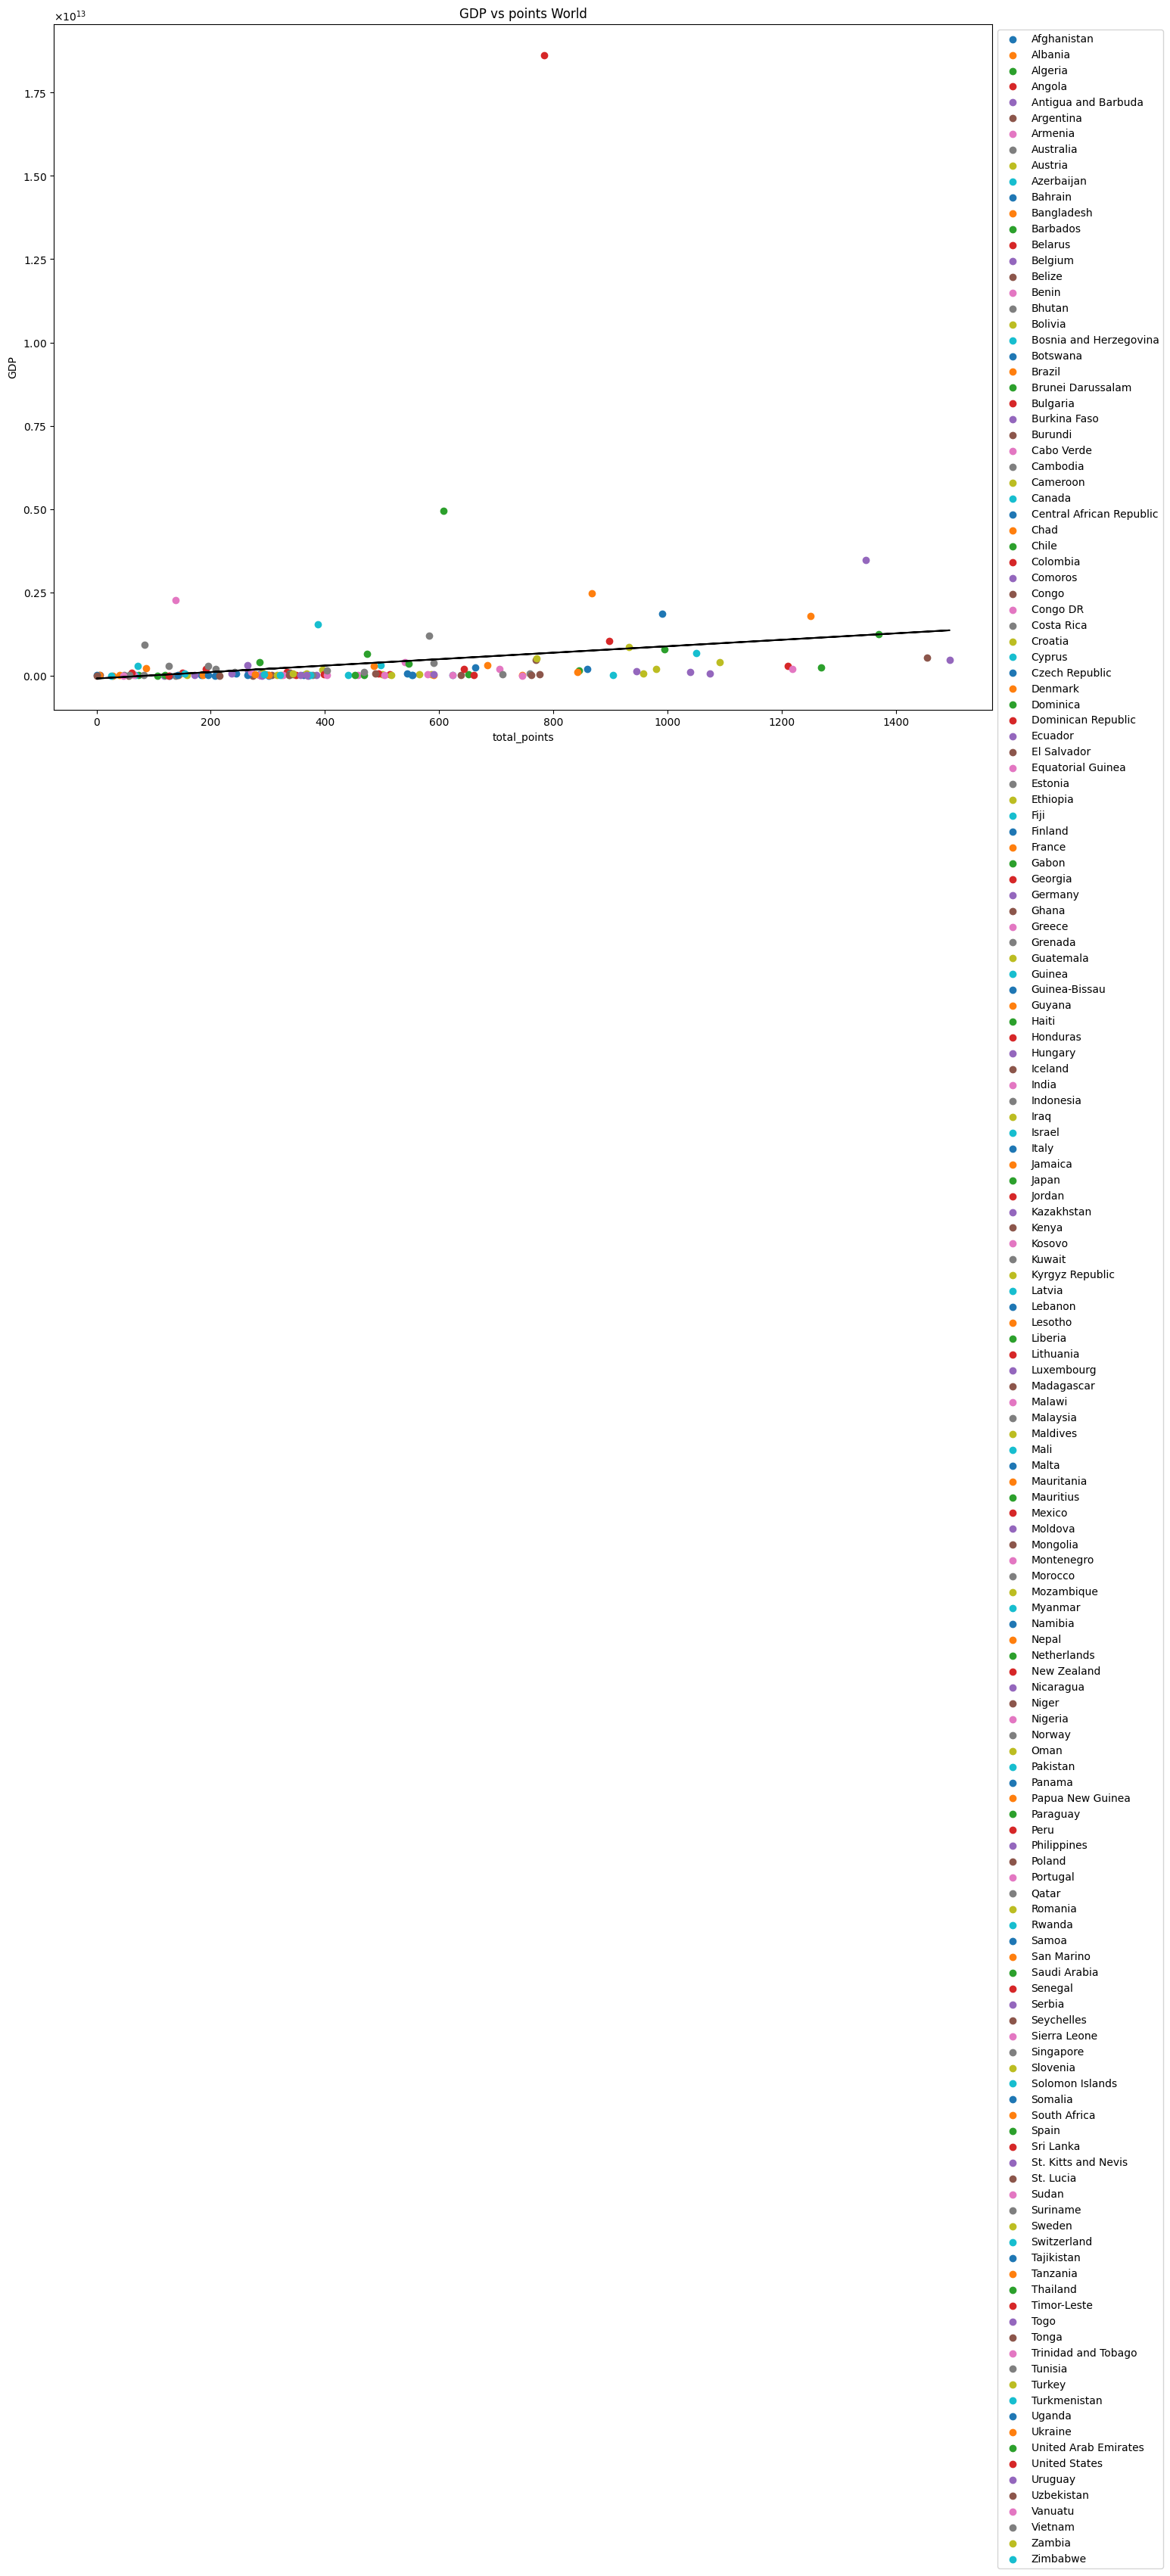

In [ ]:
#GDP vs points world 

markers = ['o', 's','p', 'P', 'x','X', 'v', '^', 'D', 'd', '1','2','3','4','8', '>', '<', 'h', 
          'H',4,5,6,7,8,9,10,11, '$A$', '$B$', '$C$', '$D$', '$E$', '$F$', '$G$', '$E$']

confederations = master_df['confederation'].drop_duplicates()


#Create the plot and invert the x-axis so lesser value rankings are seen as
#more preferable
fig,ax = plt.subplots(figsize=(16,12), dpi= 100)
#ax.invert_xaxis()

year_df=master_df

country_groups = year_df.groupby('Country Name')
#The names if the columns we will be working with
x_label = 'total_points'
y_label = 'GDP'
#for each team, plot the salary on y axis and year on x axis
for name, group in country_groups:
    sm.OLS(group[x_label], group[y_label])
    #plot year on x axis, total payroll on y axis, choose a new marker from list of markers, set label as team
    plt.scatter(group[x_label], group[y_label], label = name)
    #set notation as scientific, use math text
    plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3), useMathText = True)


#Set the independent variable x to be the ranks of the countries in this 
#confederation and dependent variable y to be GDPs of the countries in this 
#confederation
x = year_df[x_label]
y = year_df[y_label]


reg = sm.OLS(y, sm.add_constant(x)).fit()
print('P value: ' + str(reg.pvalues[1]))
#Calculate the linear regression of the variables using numpy, set the line's
#equation, and plot it in black
lin_reg = np.polyfit(x,y,1)
slope = lin_reg[0]
y_intercept = lin_reg[1]
reg_line = slope*x + y_intercept
plt.plot(x, reg_line, color="black")

plt.title('GDP vs points World')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


P value: 9.97895565411009e-05


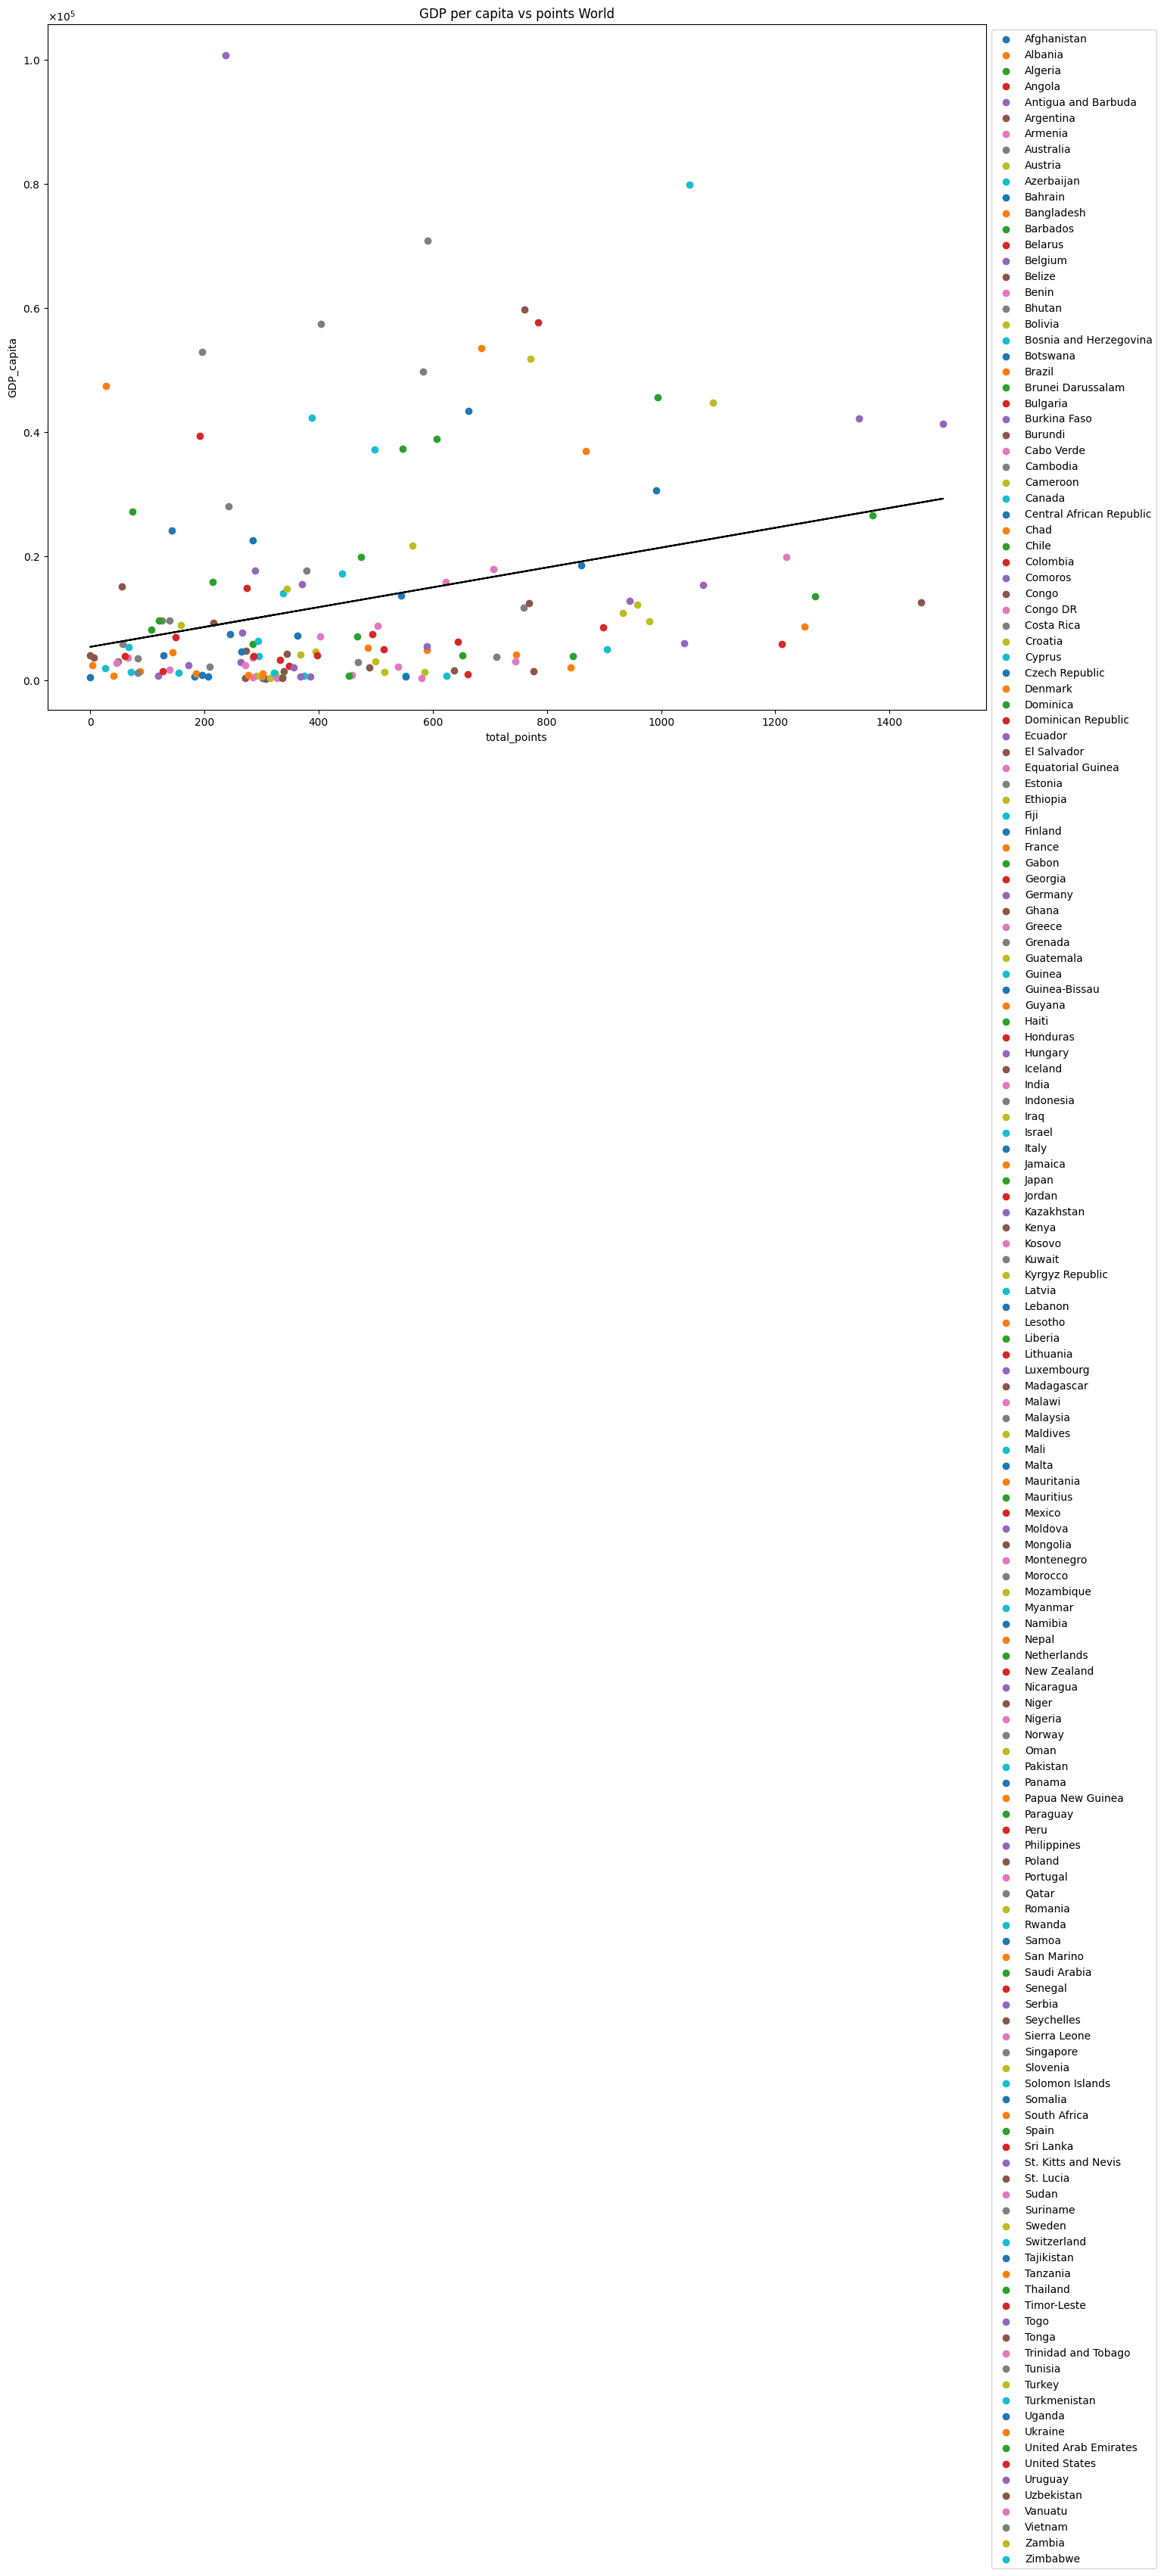

In [ ]:
#GDP capita vs points world 

markers = ['o', 's','p', 'P', 'x','X', 'v', '^', 'D', 'd', '1','2','3','4','8', '>', '<', 'h', 
          'H',4,5,6,7,8,9,10,11, '$A$', '$B$', '$C$', '$D$', '$E$', '$F$', '$G$', '$E$']

confederations = master_df['confederation'].drop_duplicates()


#Create the plot and invert the x-axis so lesser value rankings are seen as
#more preferable
fig,ax = plt.subplots(figsize=(16,12), dpi= 100)
#ax.invert_xaxis()

year_df=master_df

country_groups = year_df.groupby('Country Name')

x_label = 'total_points'
y_label = 'GDP_capita'
#for each team, plot the salary on y axis and year on x axis
for name, group in country_groups:
    sm.OLS(group[x_label], group[y_label])
    #plot year on x axis, total payroll on y axis, choose a new marker from list of markers, set label as team
    plt.scatter(group[x_label], group[y_label], label = name)
    #set notation as scientific, use math text
    plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3), useMathText = True)
  
#for k, v in year_df.iterrows():
  #plt.annotate(v['Country Name'], (v[x_label], v[y_label]))
  

#Set the independent variable x to be the ranks of the countries in this 
#confederation and dependent variable y to be GDPs of the countries in this 
#confederation
x = year_df[x_label]
y = year_df[y_label]


reg = sm.OLS(y, sm.add_constant(x)).fit()
print('P value: ' + str(reg.pvalues[1]))
#Calculate the linear regression of the variables using numpy, set the line's
#equation, and plot it in black
lin_reg = np.polyfit(x,y,1)
slope = lin_reg[0]
y_intercept = lin_reg[1]
reg_line = slope*x + y_intercept
plt.plot(x, reg_line, color="black")

plt.title('GDP per capita vs points World')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


P value: 0.11707892380039306


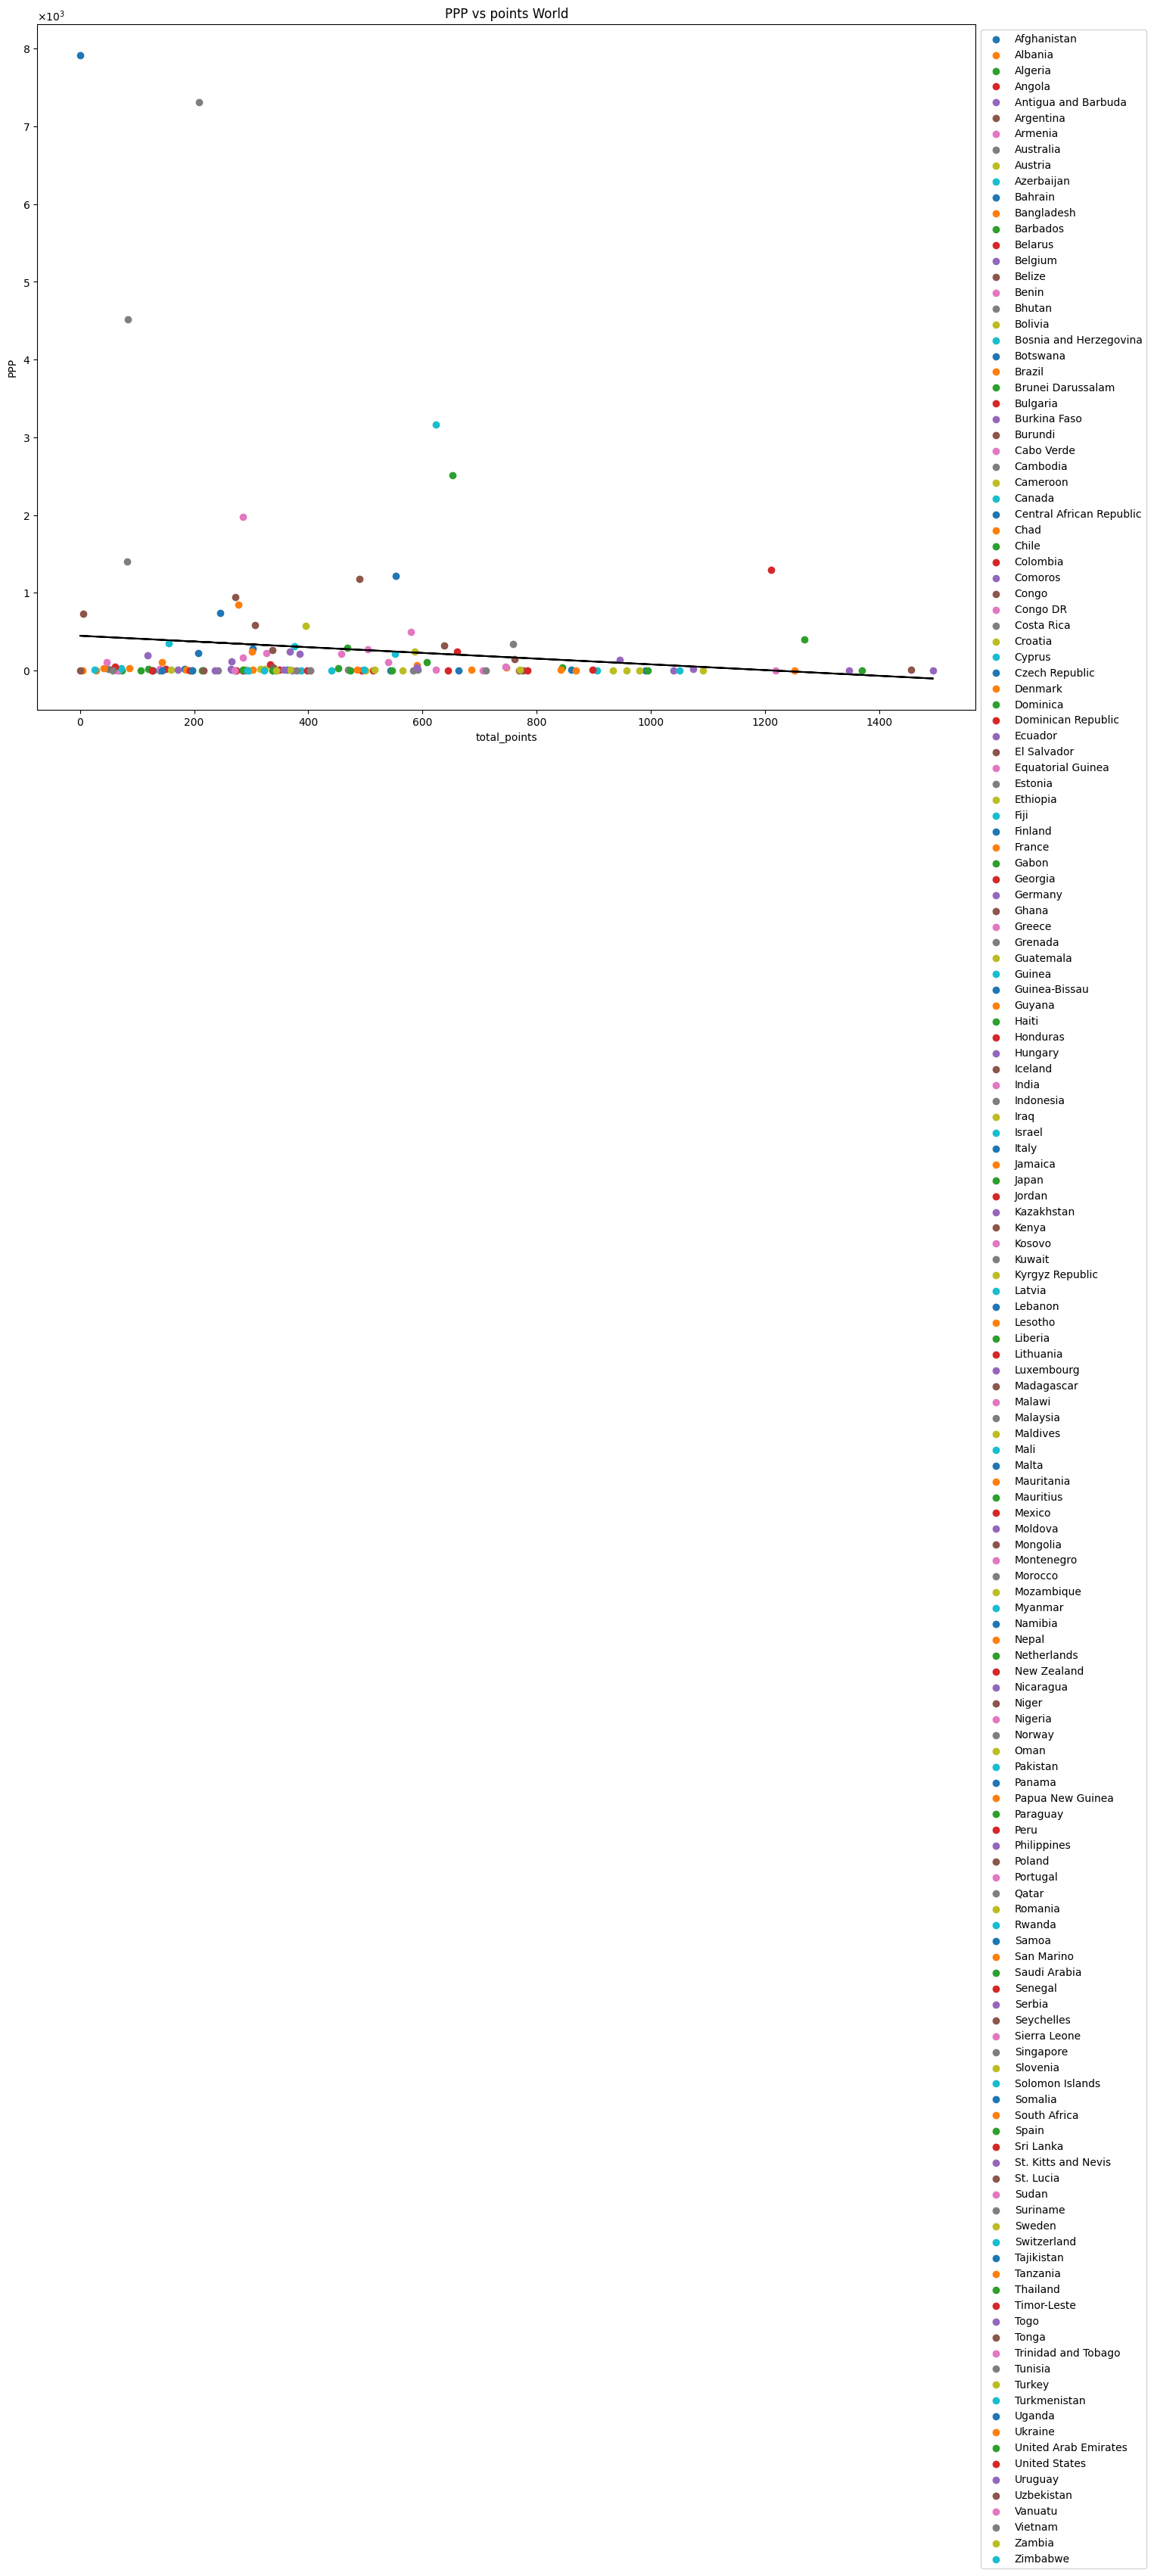

In [ ]:
#PPP vs points world 

markers = ['o', 's','p', 'P', 'x','X', 'v', '^', 'D', 'd', '1','2','3','4','8', '>', '<', 'h', 
          'H',4,5,6,7,8,9,10,11, '$A$', '$B$', '$C$', '$D$', '$E$', '$F$', '$G$', '$E$']

confederations = master_df['confederation'].drop_duplicates()


#Create the plot and invert the x-axis so lesser value rankings are seen as
#more preferable
fig,ax = plt.subplots(figsize=(16,12), dpi= 100)
#ax.invert_xaxis()

year_df=master_df

country_groups = year_df.groupby('Country Name')

x_label = 'total_points'
y_label = 'PPP'
#for each team, plot the salary on y axis and year on x axis
for name, group in country_groups:
    sm.OLS(group[x_label], group[y_label])
    #plot year on x axis, total payroll on y axis, choose a new marker from list of markers, set label as team
    plt.scatter(group[x_label], group[y_label], label = name)
    #set notation as scientific, use math text
    plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3), useMathText = True)
  
#for k, v in year_df.iterrows():
  #plt.annotate(v['Country Name'], (v[x_label], v[y_label]))
  

#Set the independent variable x to be the ranks of the countries in this 
#confederation and dependent variable y to be GDPs of the countries in this 
#confederation
x = year_df[x_label]
y = year_df[y_label]


reg = sm.OLS(y, sm.add_constant(x)).fit()
print('P value: ' + str(reg.pvalues[1]))
#Calculate the linear regression of the variables using numpy, set the line's
#equation, and plot it in black
lin_reg = np.polyfit(x,y,1)
slope = lin_reg[0]
y_intercept = lin_reg[1]
reg_line = slope*x + y_intercept
plt.plot(x, reg_line, color="black")

plt.title('PPP vs points World')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


According to the graphs and their associated p values, GDP and GDP per capita have a strong correlation with points for the entire world, and PPP has an insignificant correlation. However, individual countries are hard to see at this scale, so zooming in and seperating based on confederation will allow for better a visualization and analysis. 



####MACRO INDICATORS vs CONFEDERATIONS####

To get a better idea as to if there is a correlation between the GDP, GDP-per-capita, and PPP of a country and it's FIFA standing, we will examine the same linear regressions as before, but specific to each confederation. This way, the regional factors/circumstances affecting each country 

If the p-value is <=.05, there is a signficant corrrelation, and if not then there is little correlation. The resulting line and scatter plot will also be plotted to display these results visually.

P value: 0.018478956876983768


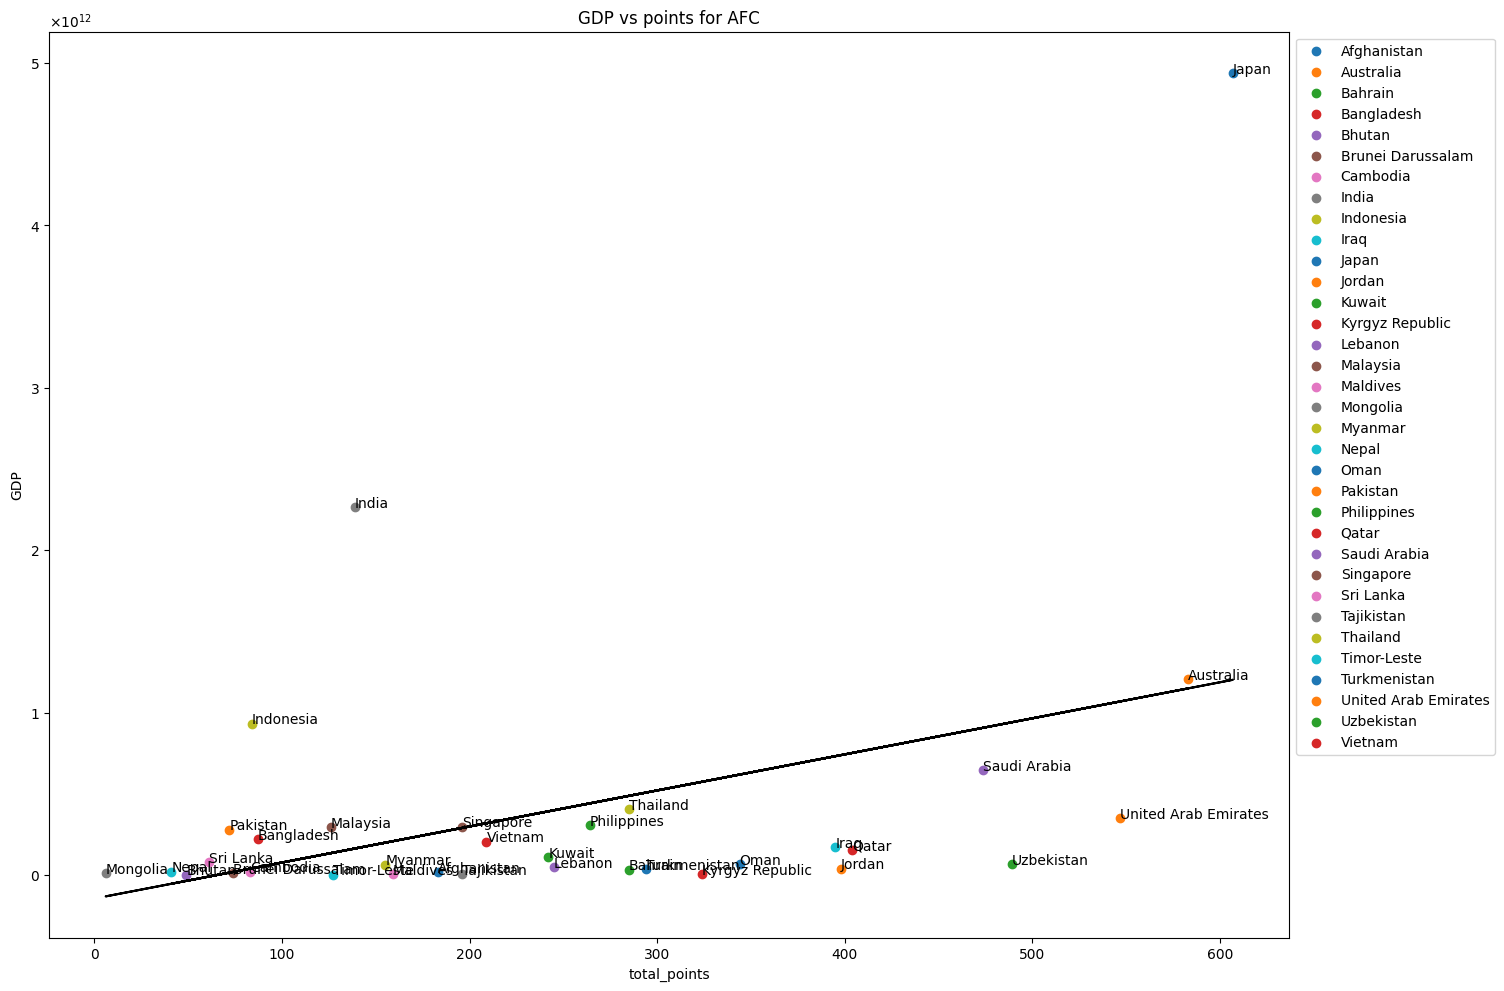

P value: 0.0002412840604305903


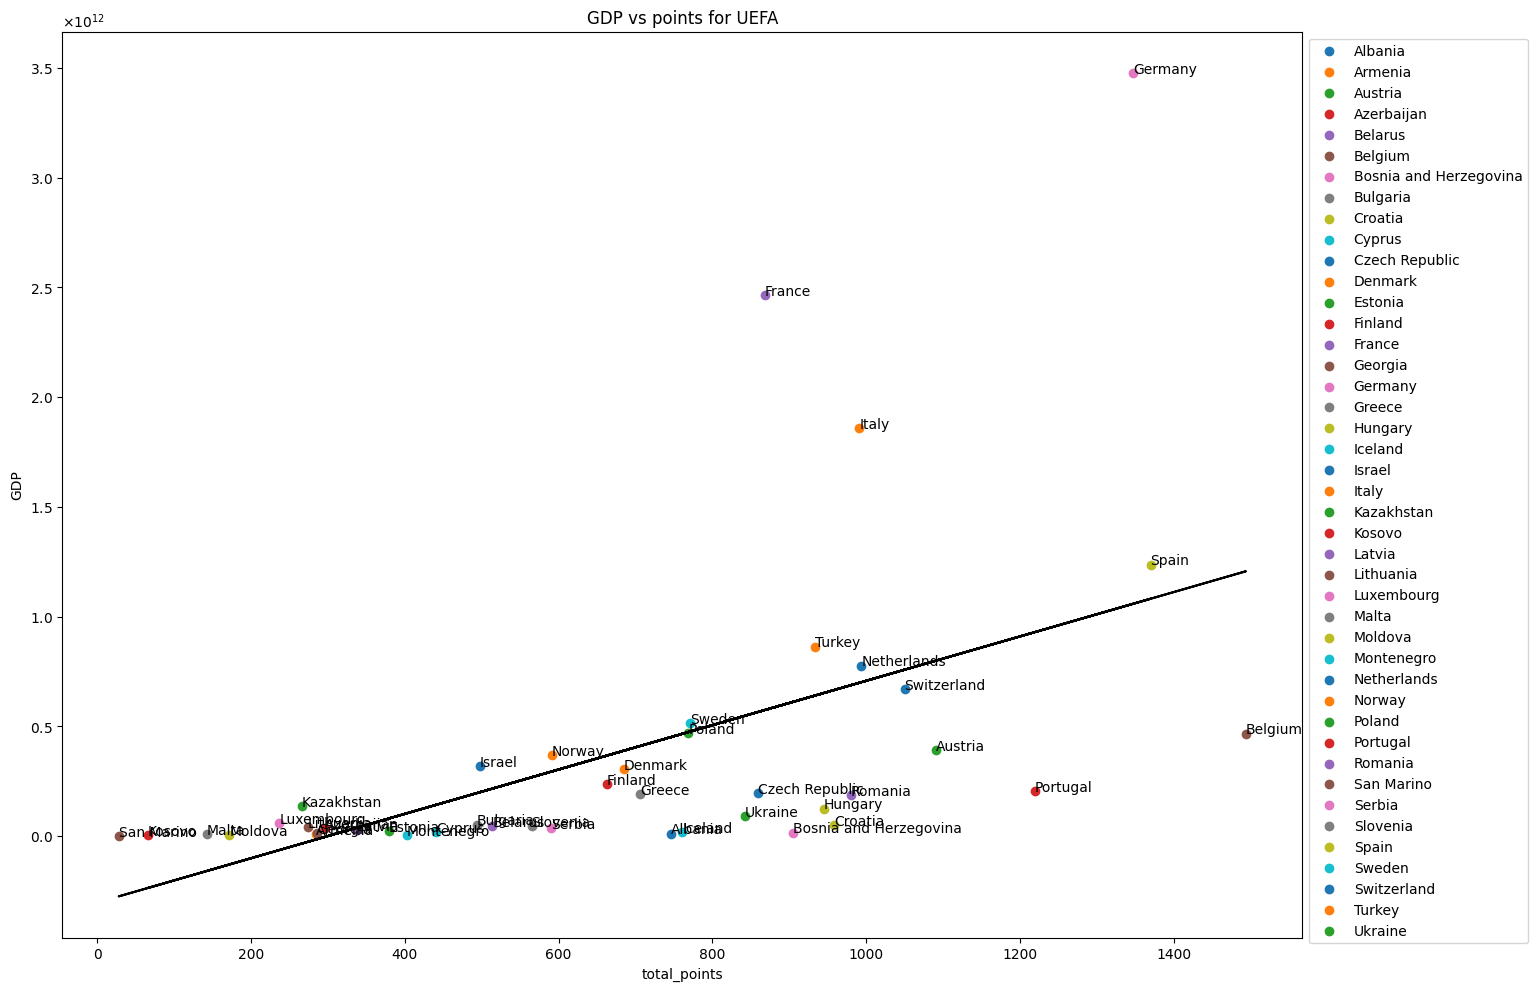

P value: 0.09060187484423693


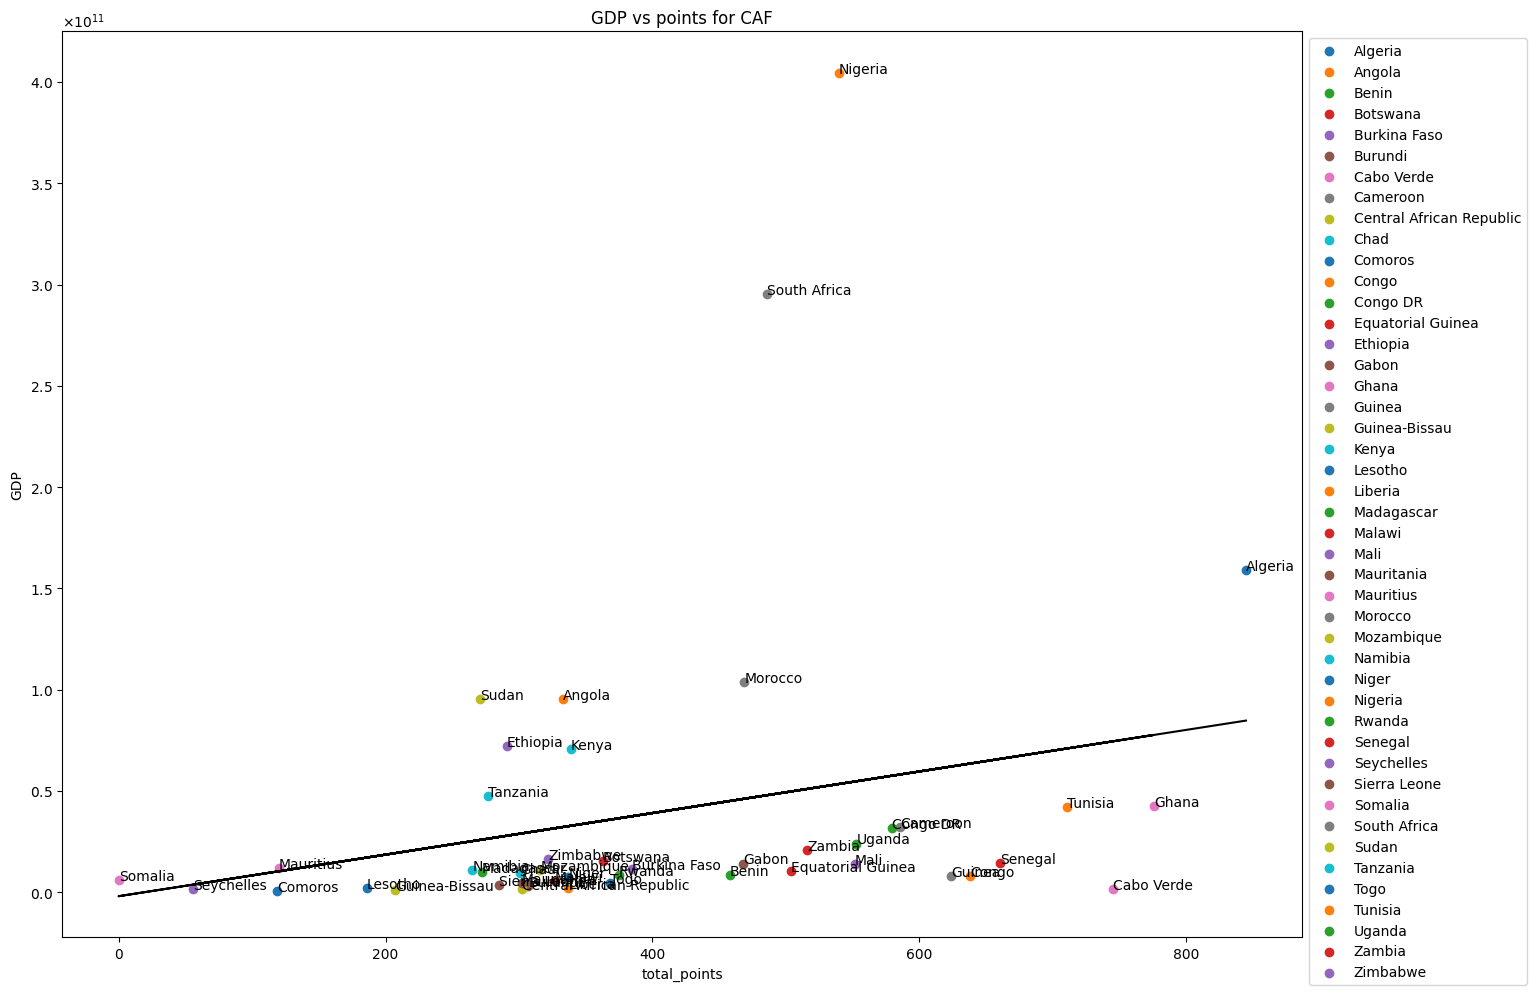

P value: 0.05397110201669657


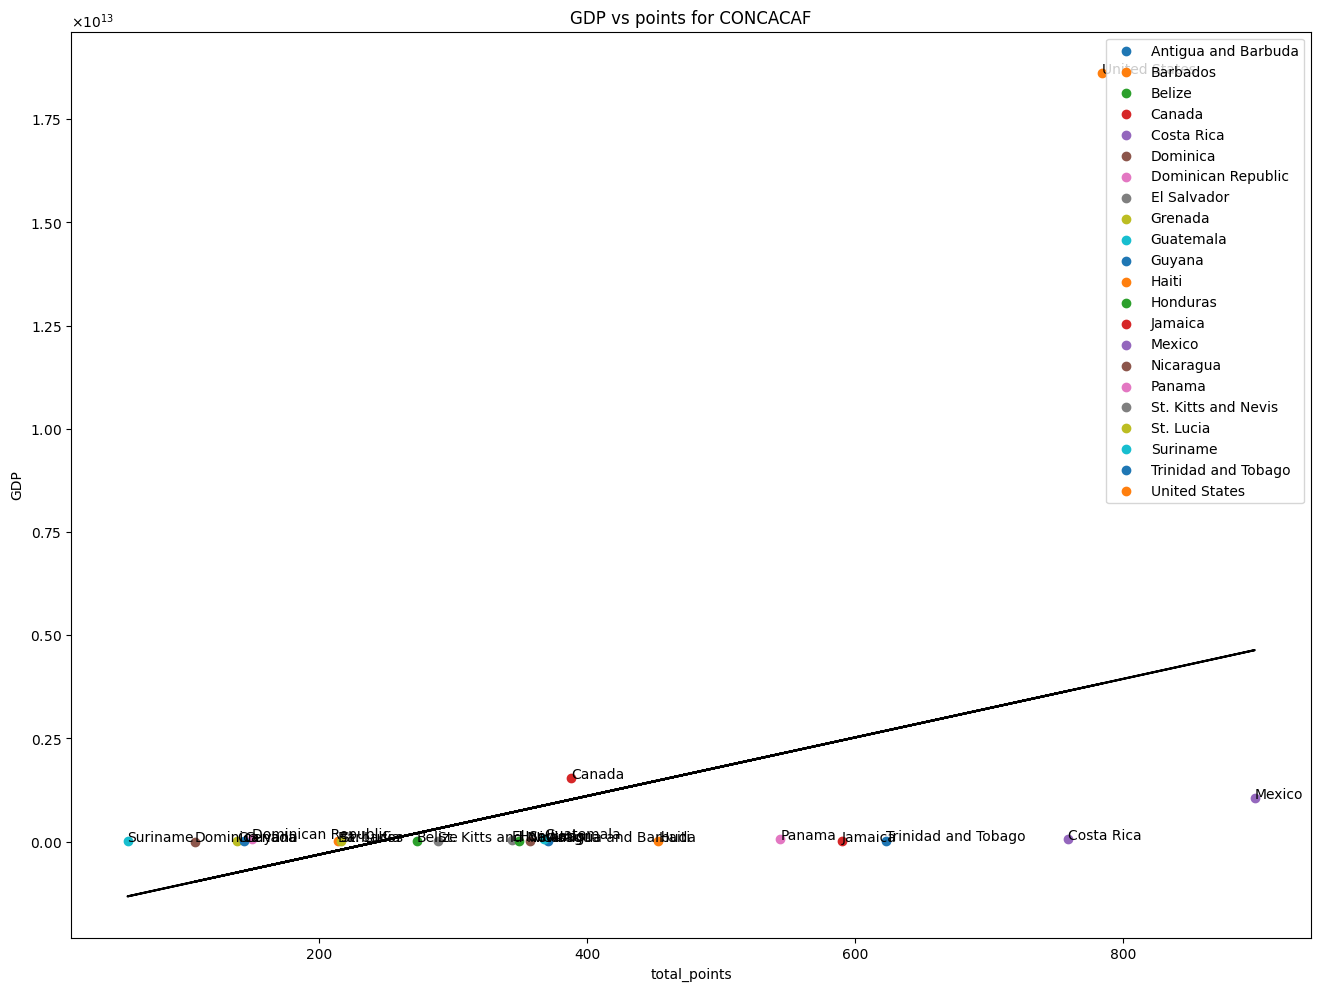

P value: 0.20290863689204547


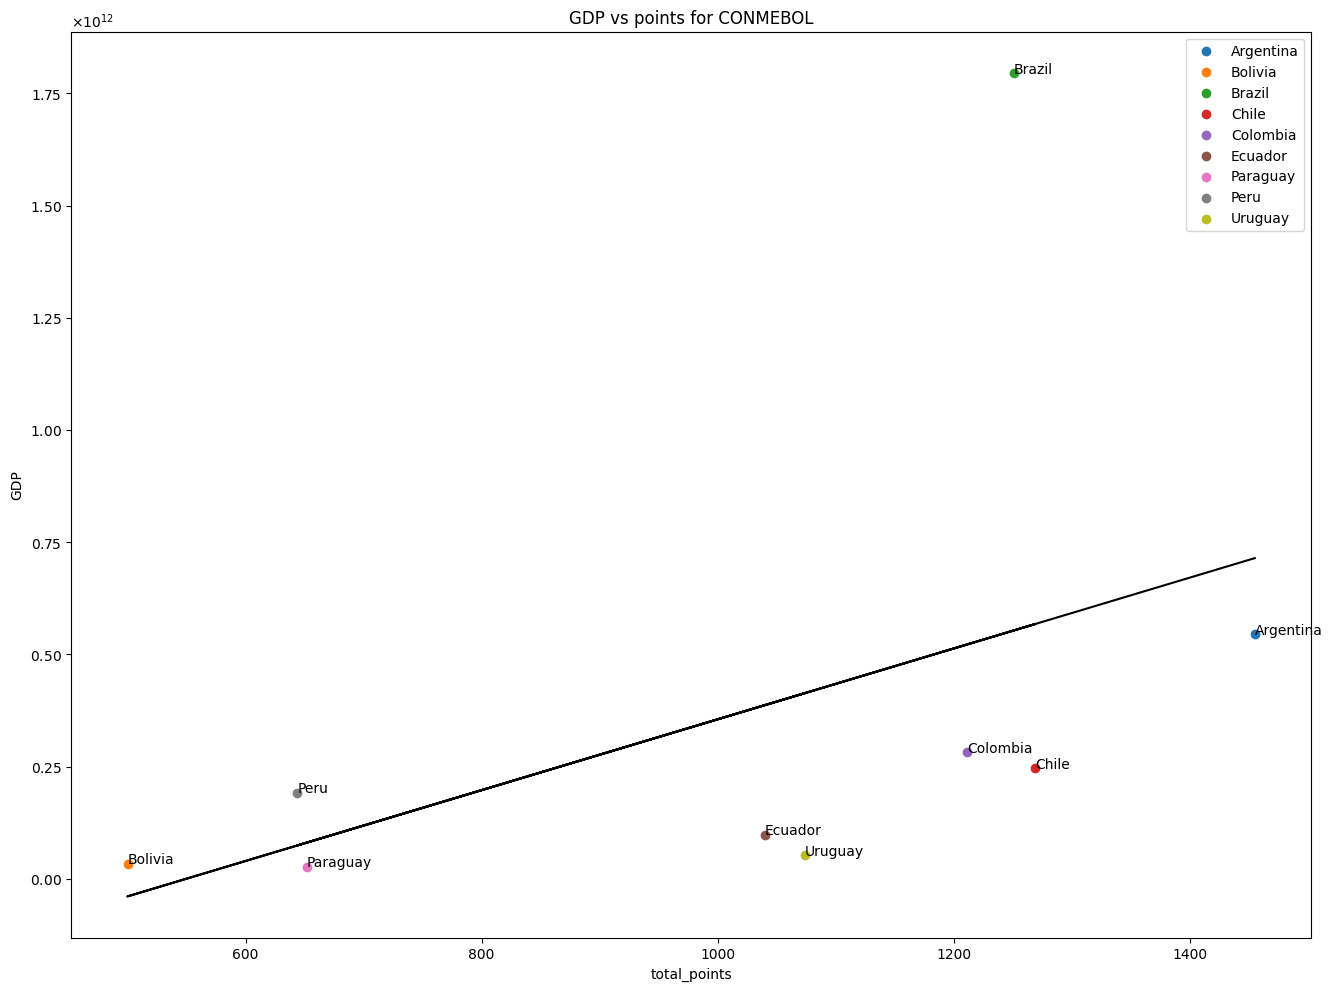

P value: 0.04930348876730901


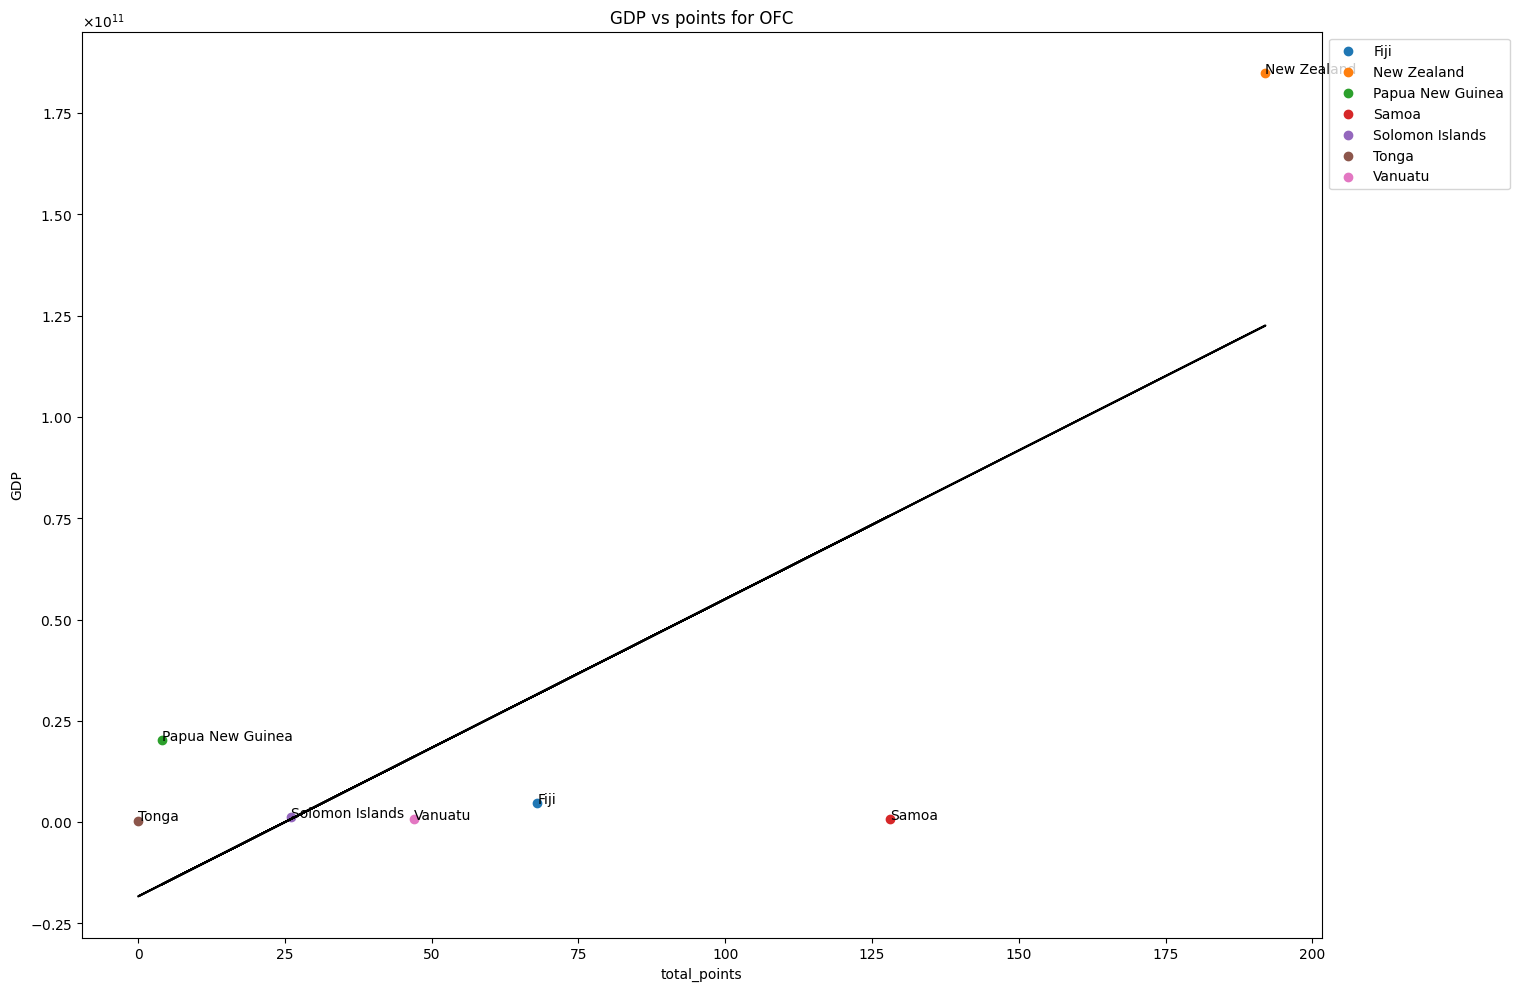

In [ ]:
markers = ['o', 's','p', 'P', 'x','X', 'v', '^', 'D', 'd', '1','2','3','4','8', '>', '<', 'h', 
          'H',4,5,6,7,8,9,10,11, '$A$', '$B$', '$C$', '$D$', '$E$', '$F$', '$G$', '$E$']

confederations = master_df['confederation'].drop_duplicates()

for confederation in confederations:

  #Create the plot and invert the x-axis so lesser value rankings are seen as
  #more preferable
  fig,ax = plt.subplots(figsize=(16,12), dpi= 100)
  #ax.invert_xaxis()

  year_df=master_df
  year_df = master_df.loc[master_df['confederation']==confederation]

  country_groups = year_df.groupby('Country Name')

  x_label = 'total_points'
  y_label = 'GDP'
  #for each team, plot the salary on y axis and year on x axis
  for name, group in country_groups:
      sm.OLS(group[x_label], group[y_label])
      #plot year on x axis, total payroll on y axis, choose a new marker from list of markers, set label as team
      plt.scatter(group[x_label], group[y_label], label = name)
      #set notation as scientific, use math text
      plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3), useMathText = True)
    
  for k, v in year_df.iterrows():
    plt.annotate(v['Country Name'], (v[x_label], v[y_label]))
    

  #Set the independent variable x to be the ranks of the countries in this 
  #confederation and dependent variable y to be GDPs of the countries in this 
  #confederation
  x = year_df[x_label]
  y = year_df[y_label]


  reg = sm.OLS(y, sm.add_constant(x)).fit()
  print('P value: ' + str(reg.pvalues[1]))
  #Calculate the linear regression of the variables using numpy, set the line's
  #equation, and plot it in black
  lin_reg = np.polyfit(x,y,1)
  slope = lin_reg[0]
  y_intercept = lin_reg[1]
  reg_line = slope*x + y_intercept
  plt.plot(x, reg_line, color="black")

  plt.title('GDP vs points for ' + confederation)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend(bbox_to_anchor=(1.0, 1.0))
  plt.show()

The scatter plots above plot GDP vs points for all countries, with plots seperated by their confederation. According to the p values, there is a significant correlation between GDP and points for the AFC and UEFA confederations, with all other confederations having an insignificant correlation.

P value: 0.0012027344565364061


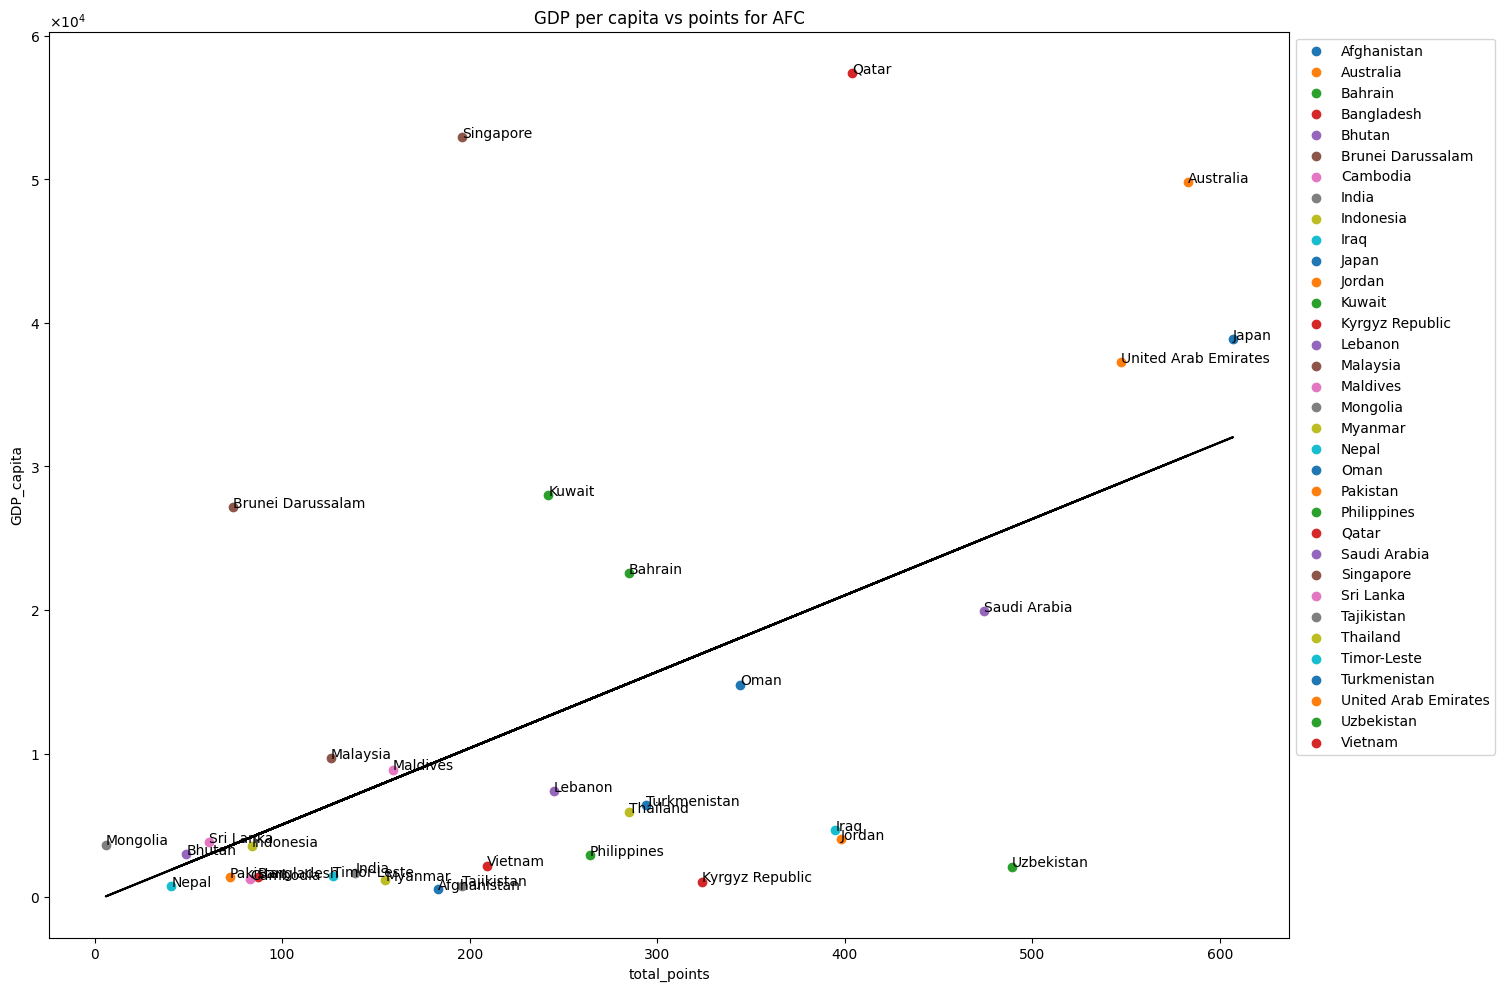

P value: 0.22210985633475808


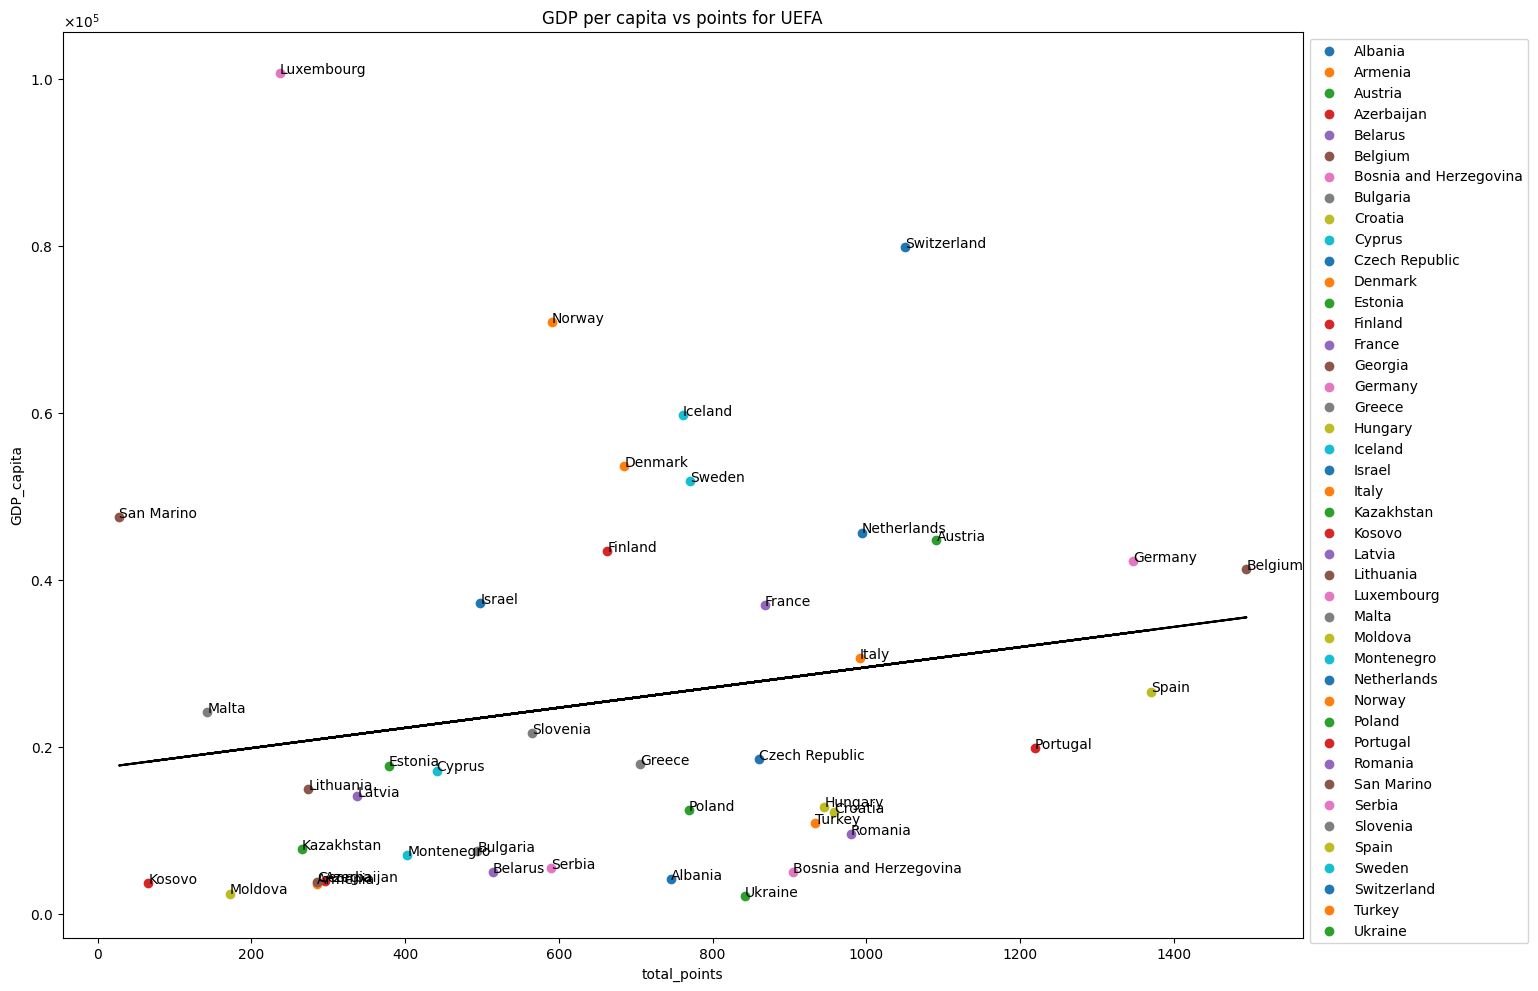

P value: 0.48349261674087574


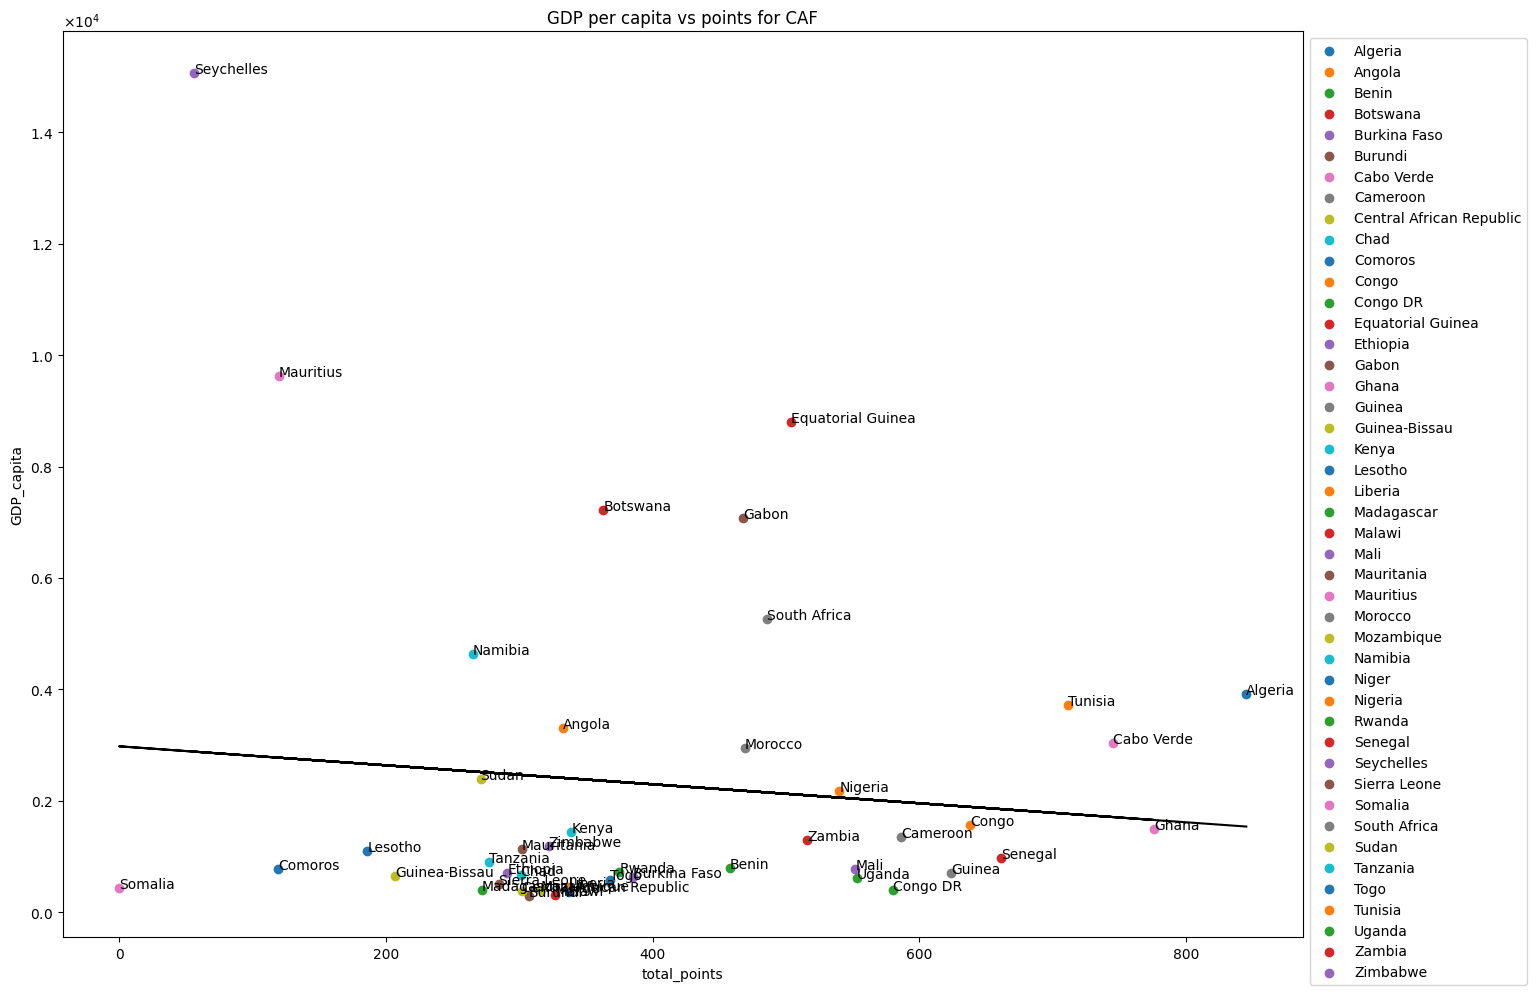

P value: 0.10633954172818269


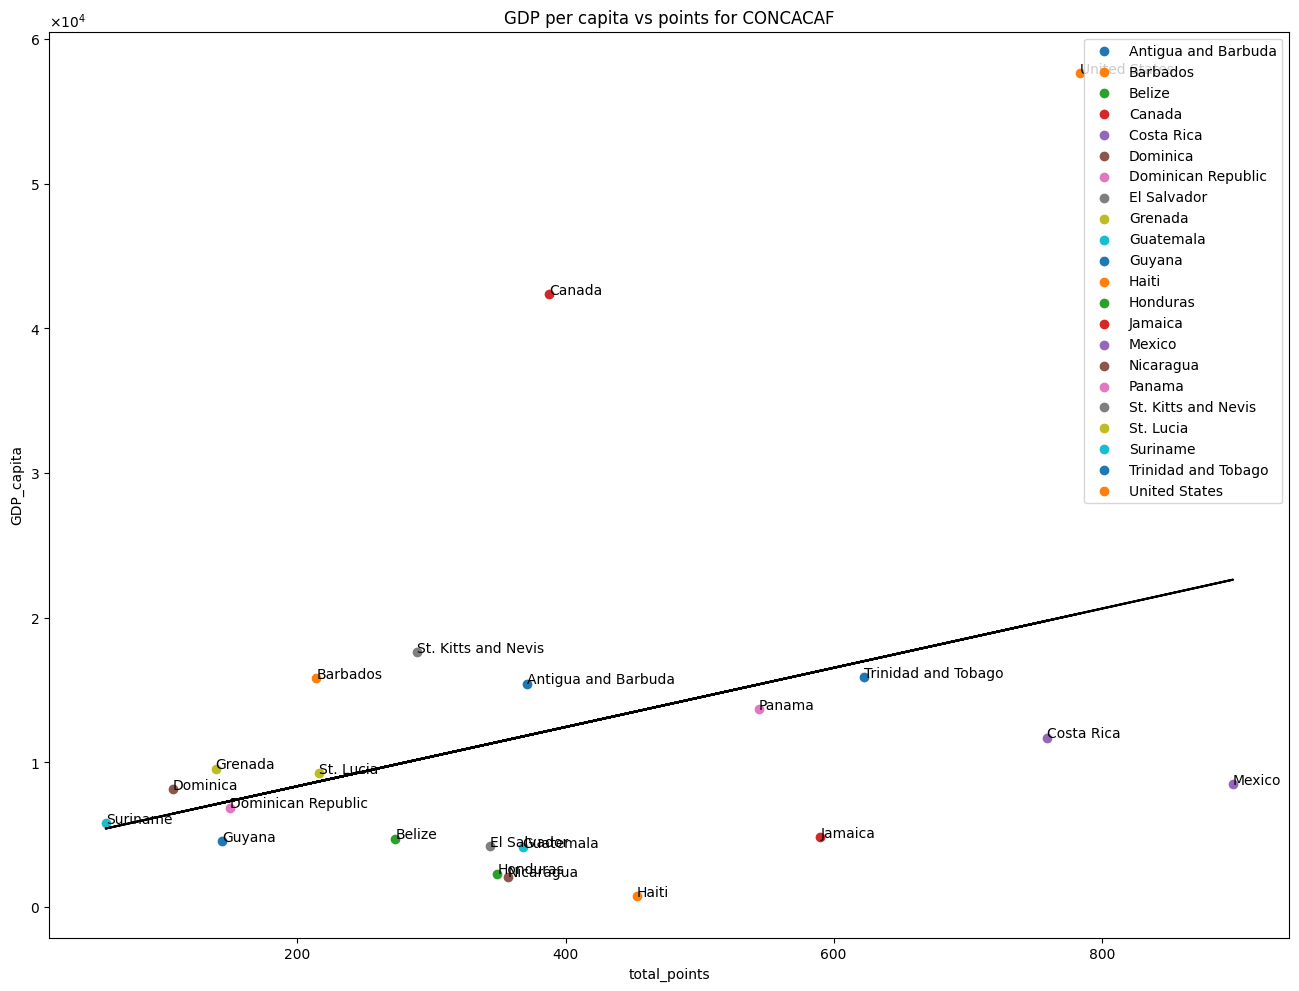

P value: 0.03793824215233343


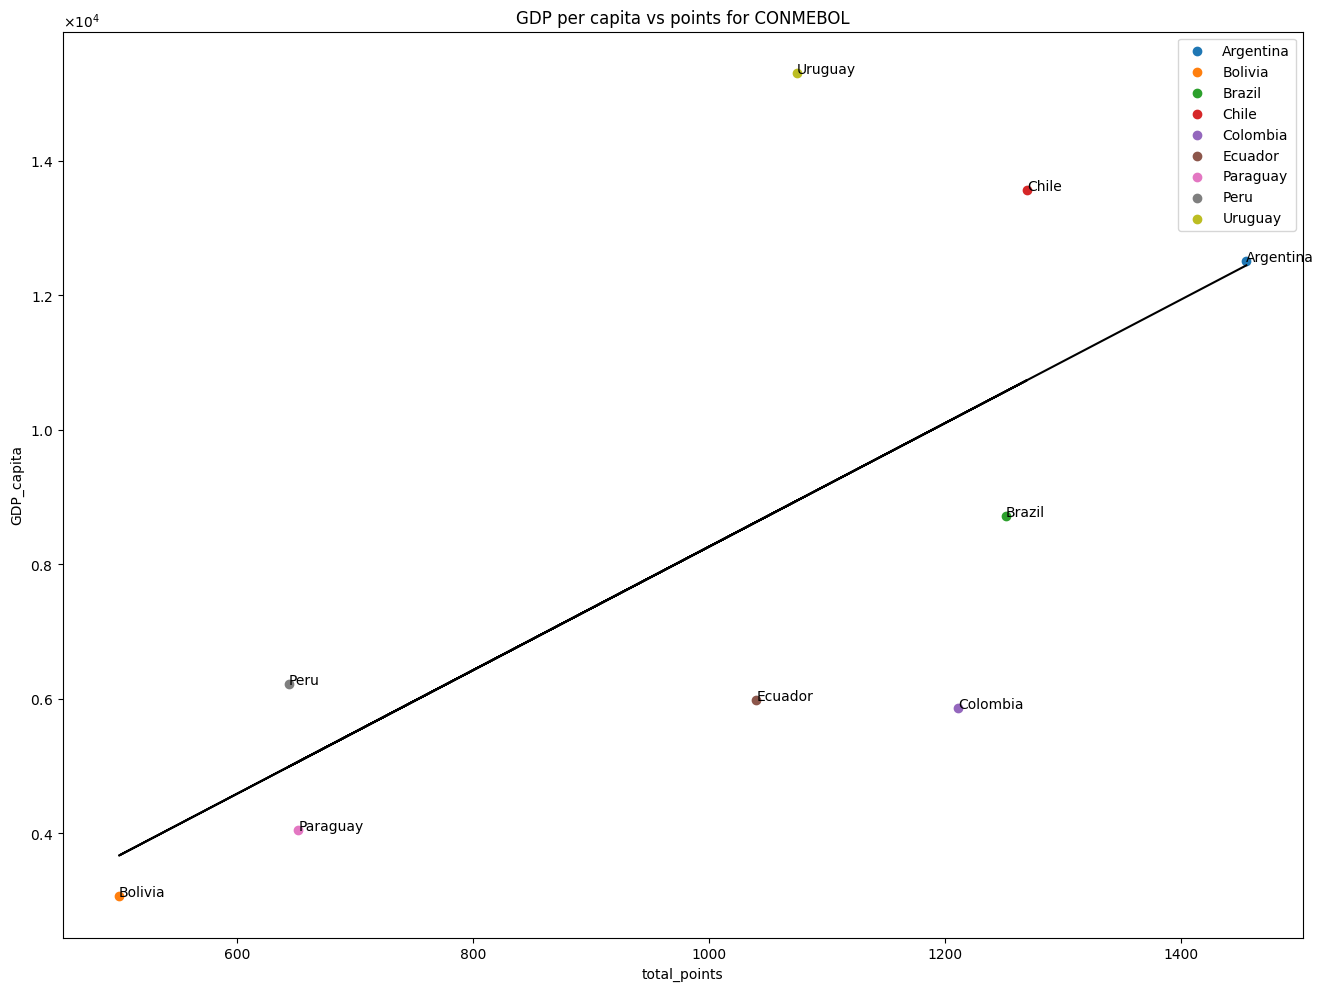

P value: 0.02866526239773614


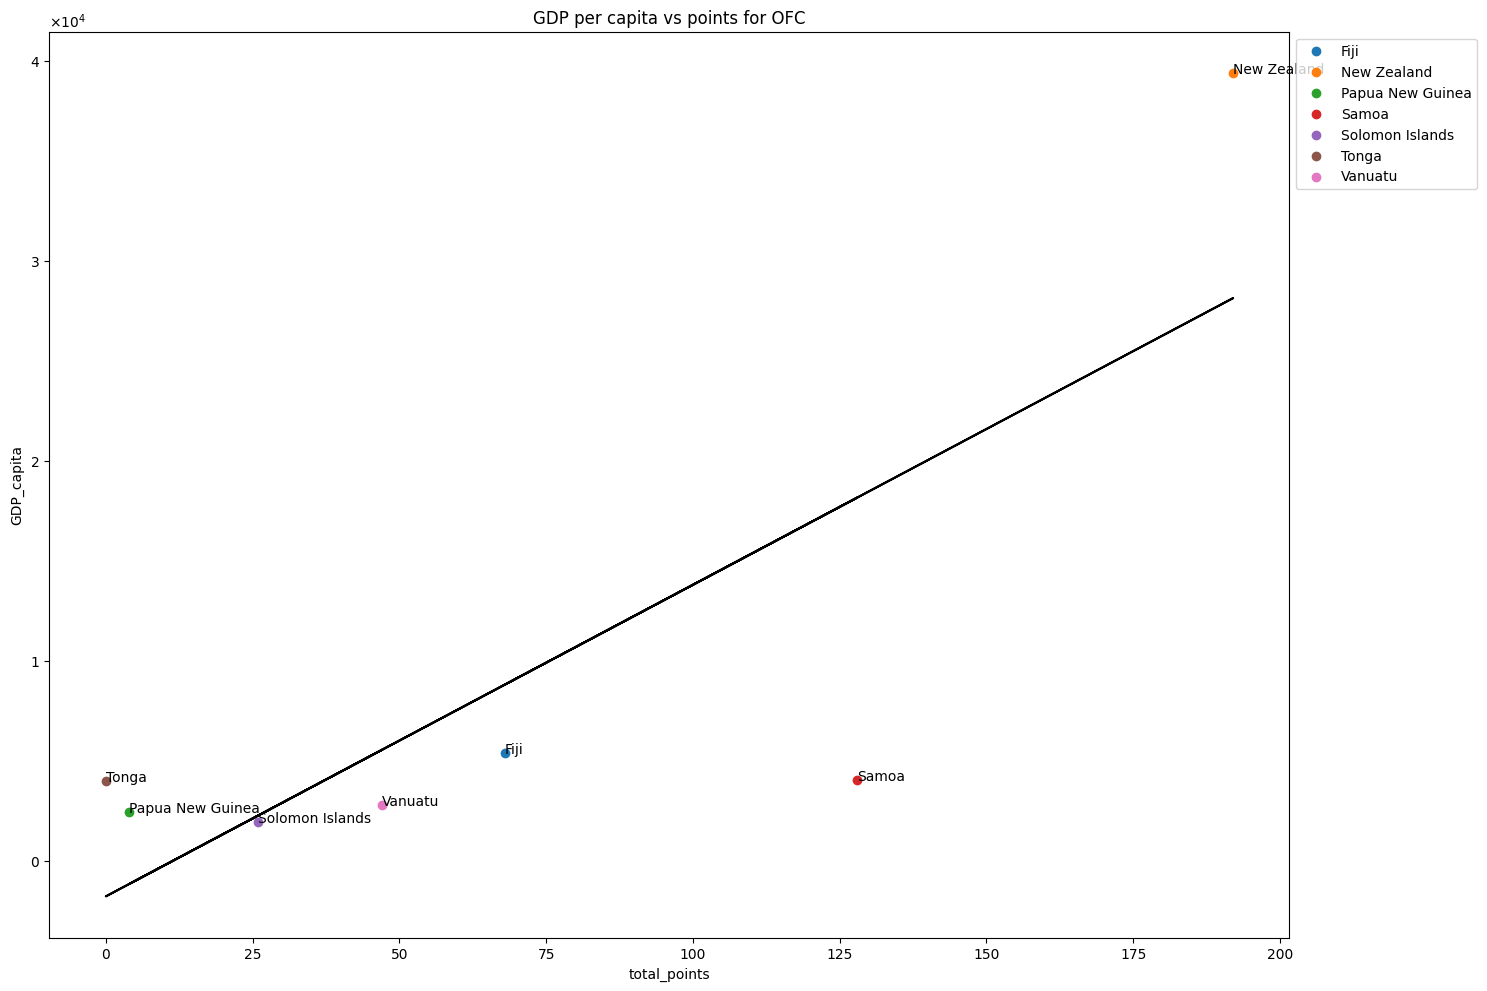

In [ ]:
markers = ['o', 's','p', 'P', 'x','X', 'v', '^', 'D', 'd', '1','2','3','4','8', '>', '<', 'h', 
           'H',4,5,6,7,8,9,10,11, '$A$', '$B$', '$C$', '$D$', '$E$', '$F$', '$G$', '$E$']

confederations = master_df['confederation'].drop_duplicates()

for confederation in confederations:
  #Create the plot and invert the x-axis so lesser value rankings are seen as
  #more preferable
  fig,ax = plt.subplots(figsize=(16,12), dpi= 100)
  #ax.invert_xaxis()

  year_df = master_df.loc[master_df['confederation']==confederation]
  country_groups = year_df.groupby('Country Name')

  x_label = 'total_points'
  y_label = 'GDP_capita'
  #for each team, plot the salary on y axis and year on x axis
  for name, group in country_groups:
      sm.OLS(group[x_label], group[y_label])
      #plot year on x axis, total payroll on y axis, choose a new marker from list of markers, set label as team
      plt.scatter(group[x_label], group[y_label], label = name)
      #set notation as scientific, use math text
      plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3), useMathText = True)
    
  for k, v in year_df.iterrows():
    plt.annotate(v['Country Name'], (v[x_label], v[y_label]))
    

  #Set the independent variable x to be the ranks of the countries in this 
  #confederation and dependent variable y to be GDPs of the countries in this 
  #confederation
  x = year_df[x_label]
  y = year_df[y_label]


  reg = sm.OLS(y, sm.add_constant(x)).fit()
  print('P value: ' + str(reg.pvalues[1]))
  #Calculate the linear regression of the variables using numpy, set the line's
  #equation, and plot it in black
  lin_reg = np.polyfit(x,y,1)
  slope = lin_reg[0]
  y_intercept = lin_reg[1]
  reg_line = slope*x + y_intercept
  plt.plot(x, reg_line, color="black")

  plt.title('GDP per capita vs points for ' + confederation)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend(bbox_to_anchor=(1.0, 1.0))
  plt.show()

The scatter plots above plot GDP per capita vs points for all countries, with plots seperated by their confederation. According to the p values, there is a significant correlation between GDP per capita and points for the AFC and CONMEBOL confederations, with all other confederations having an insignificant correlation.


P value: 0.48650411795804793


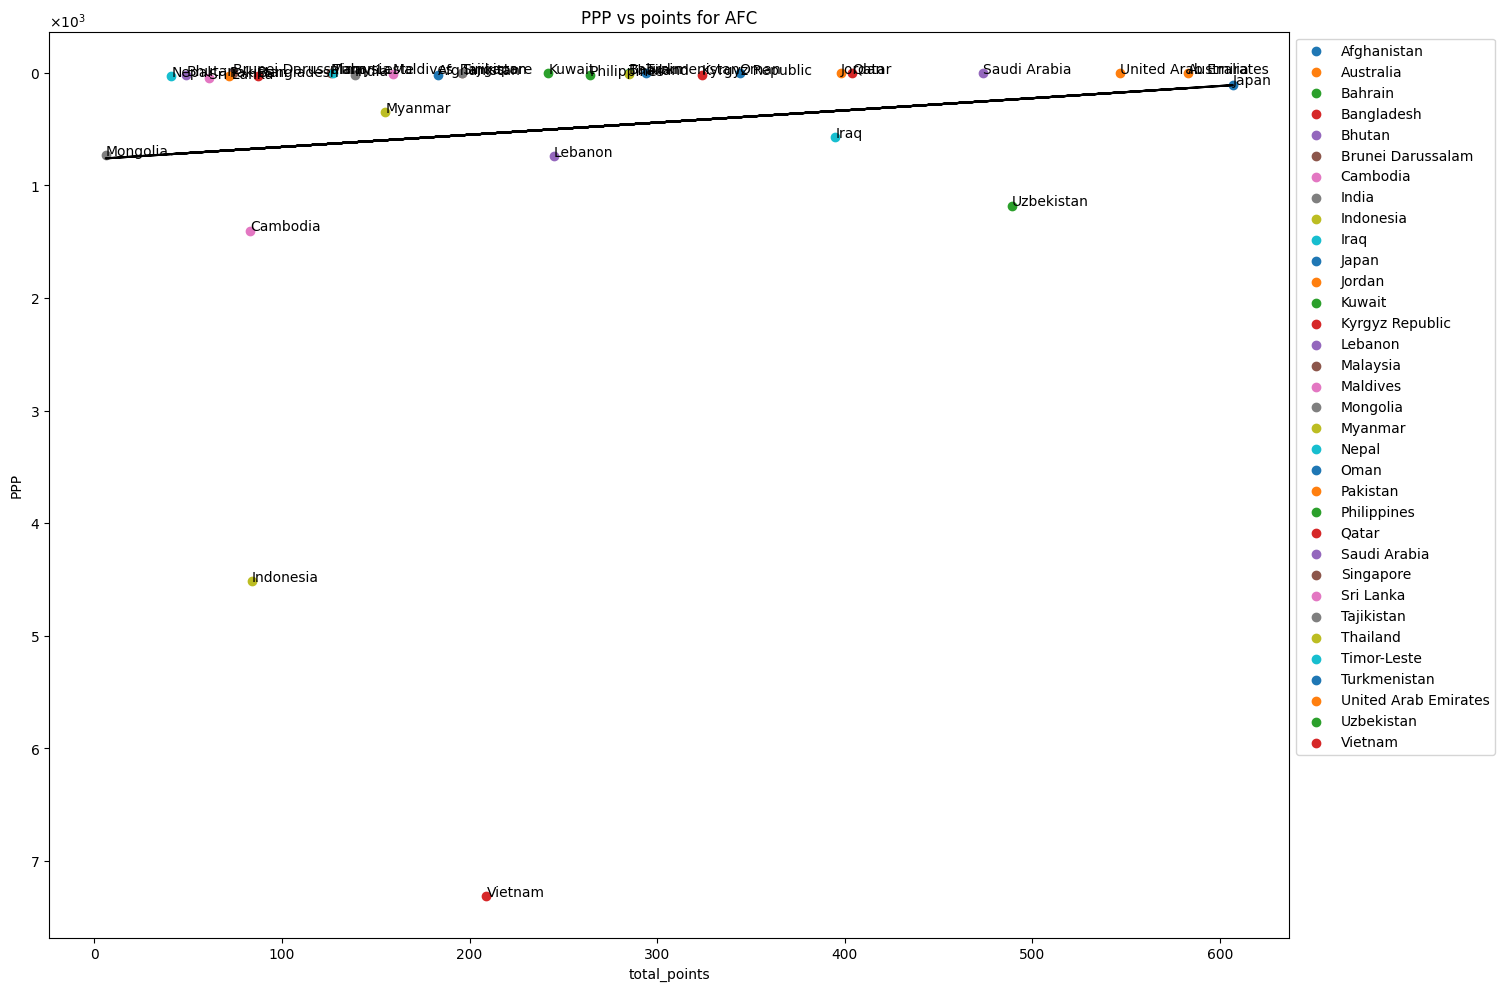

P value: 0.5703239890238323


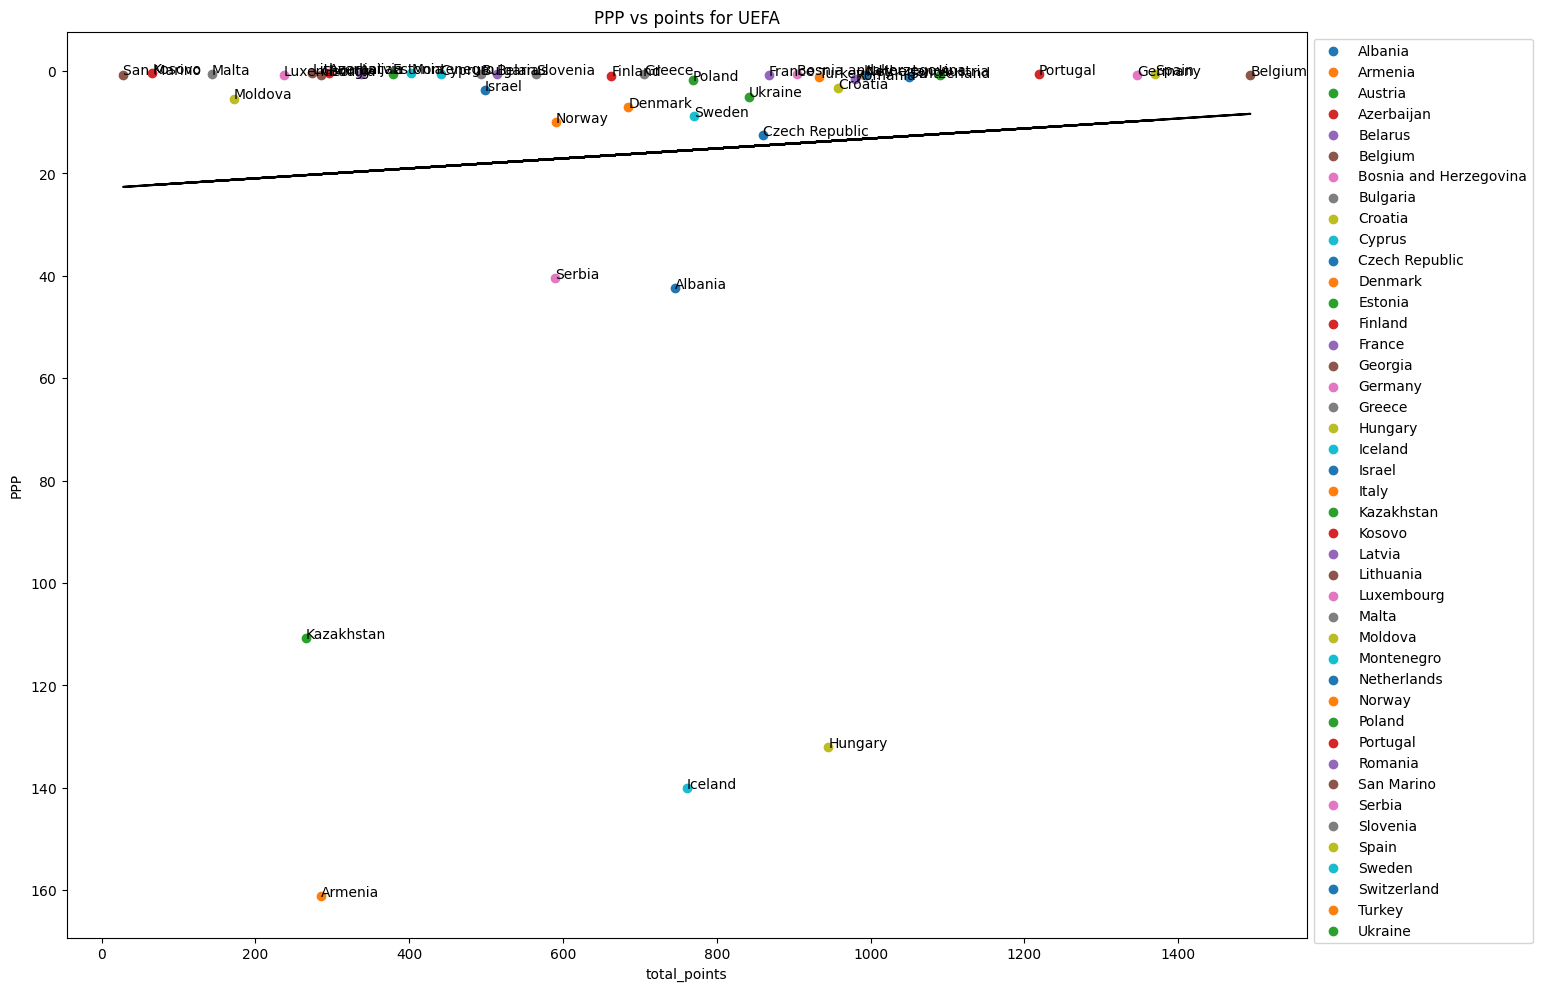

P value: 0.10213476566138502


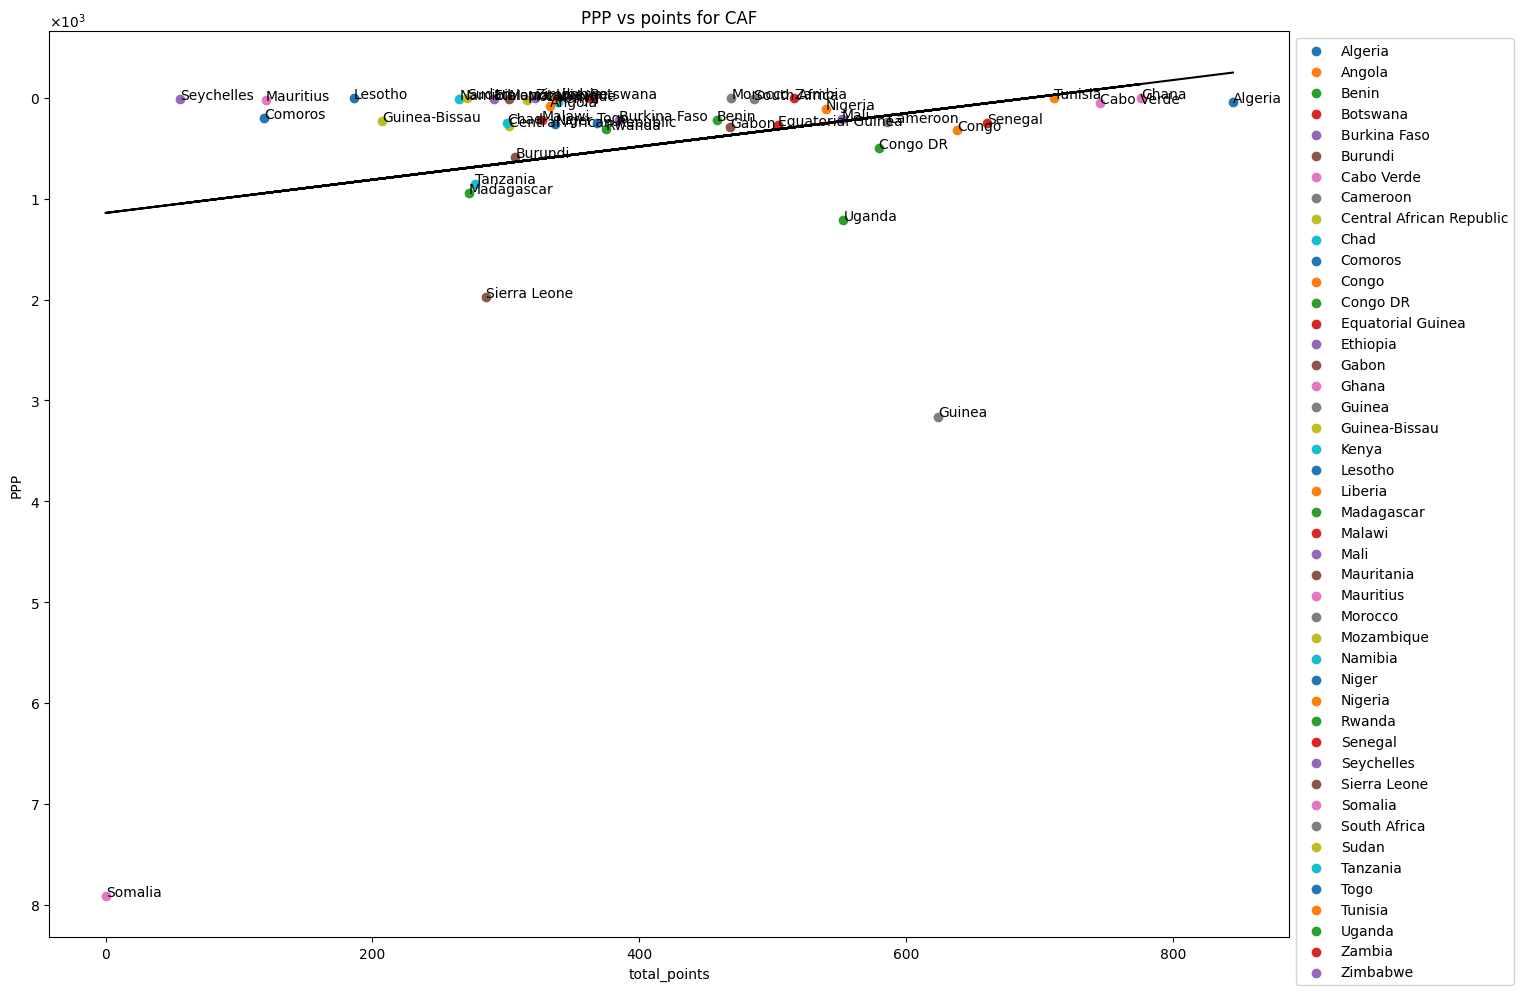

P value: 0.14676968613931507


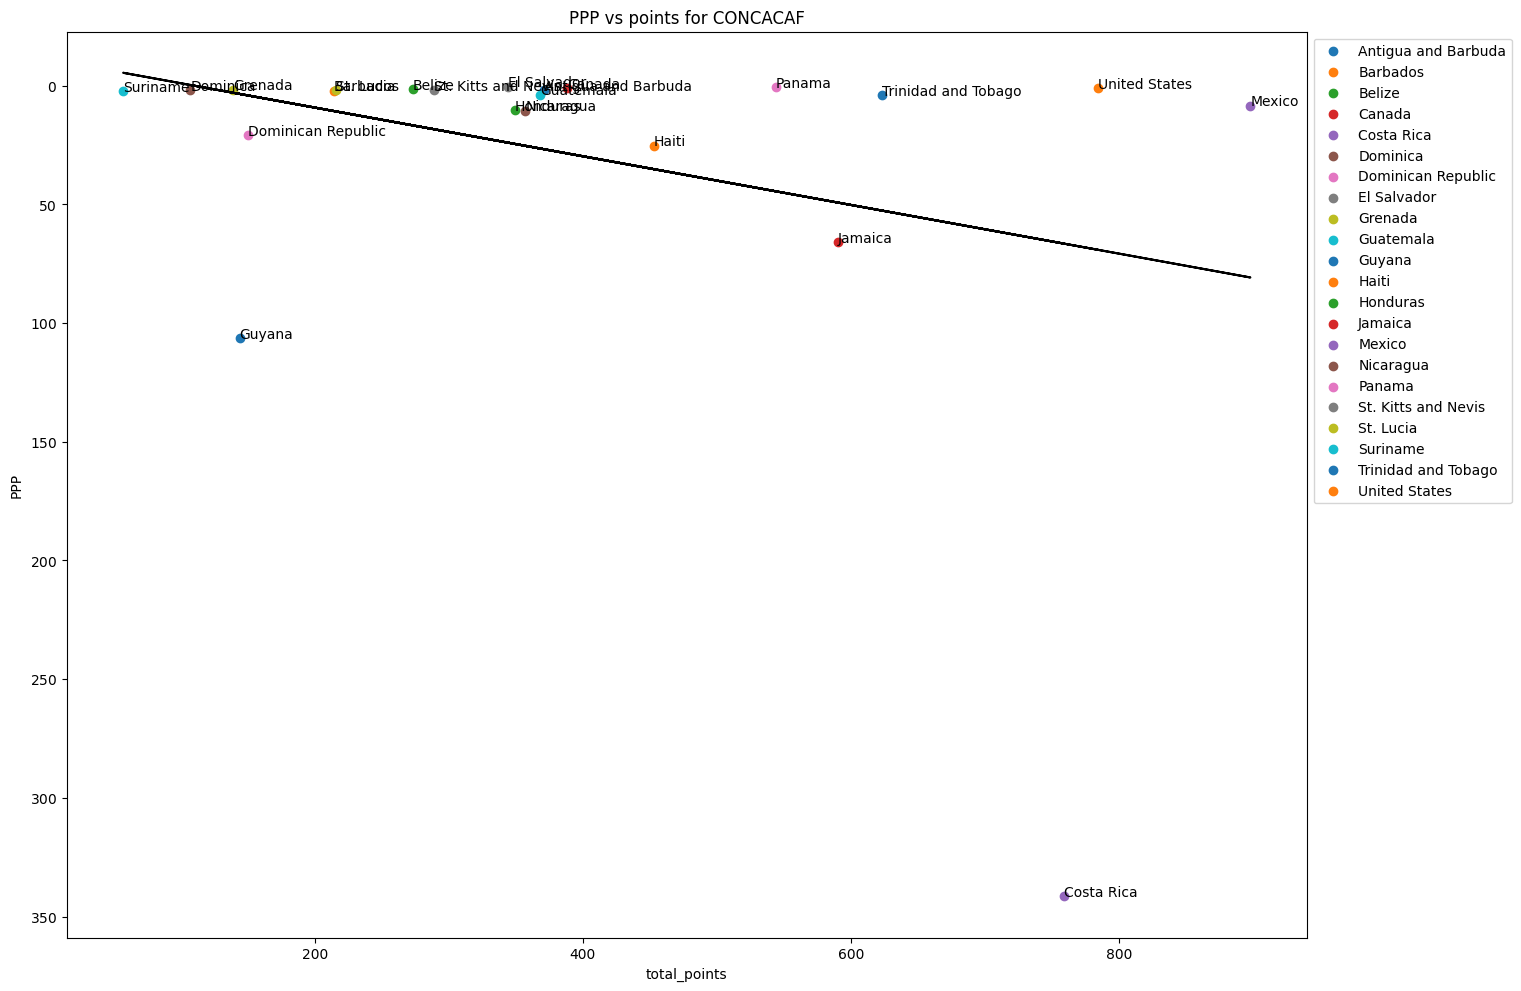

P value: 0.5544214217577045


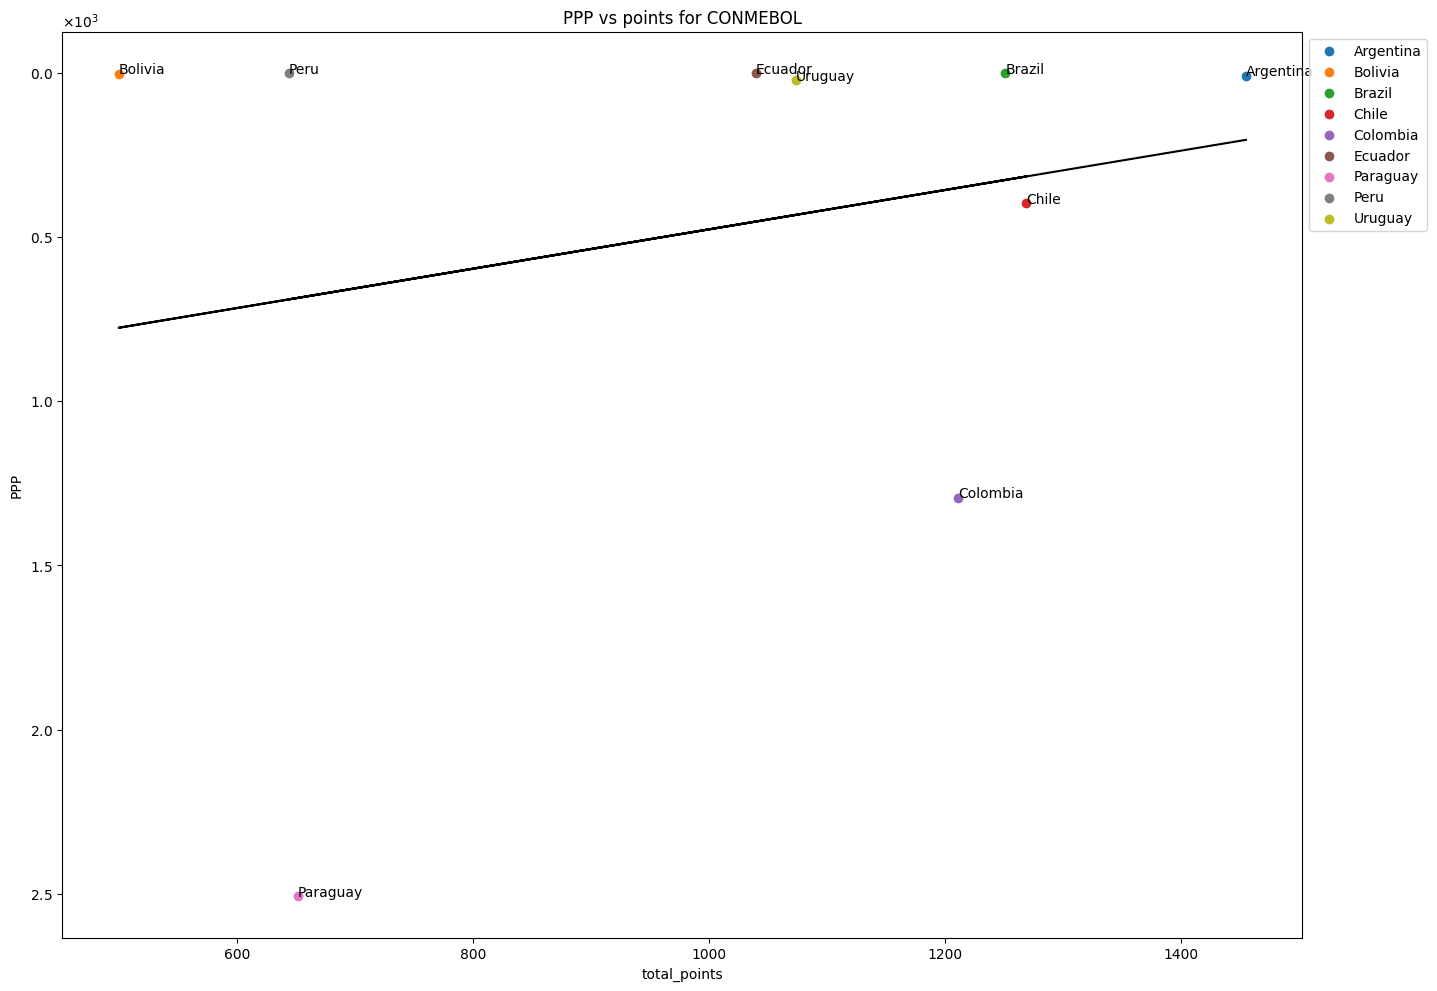

P value: 0.7696488294407736


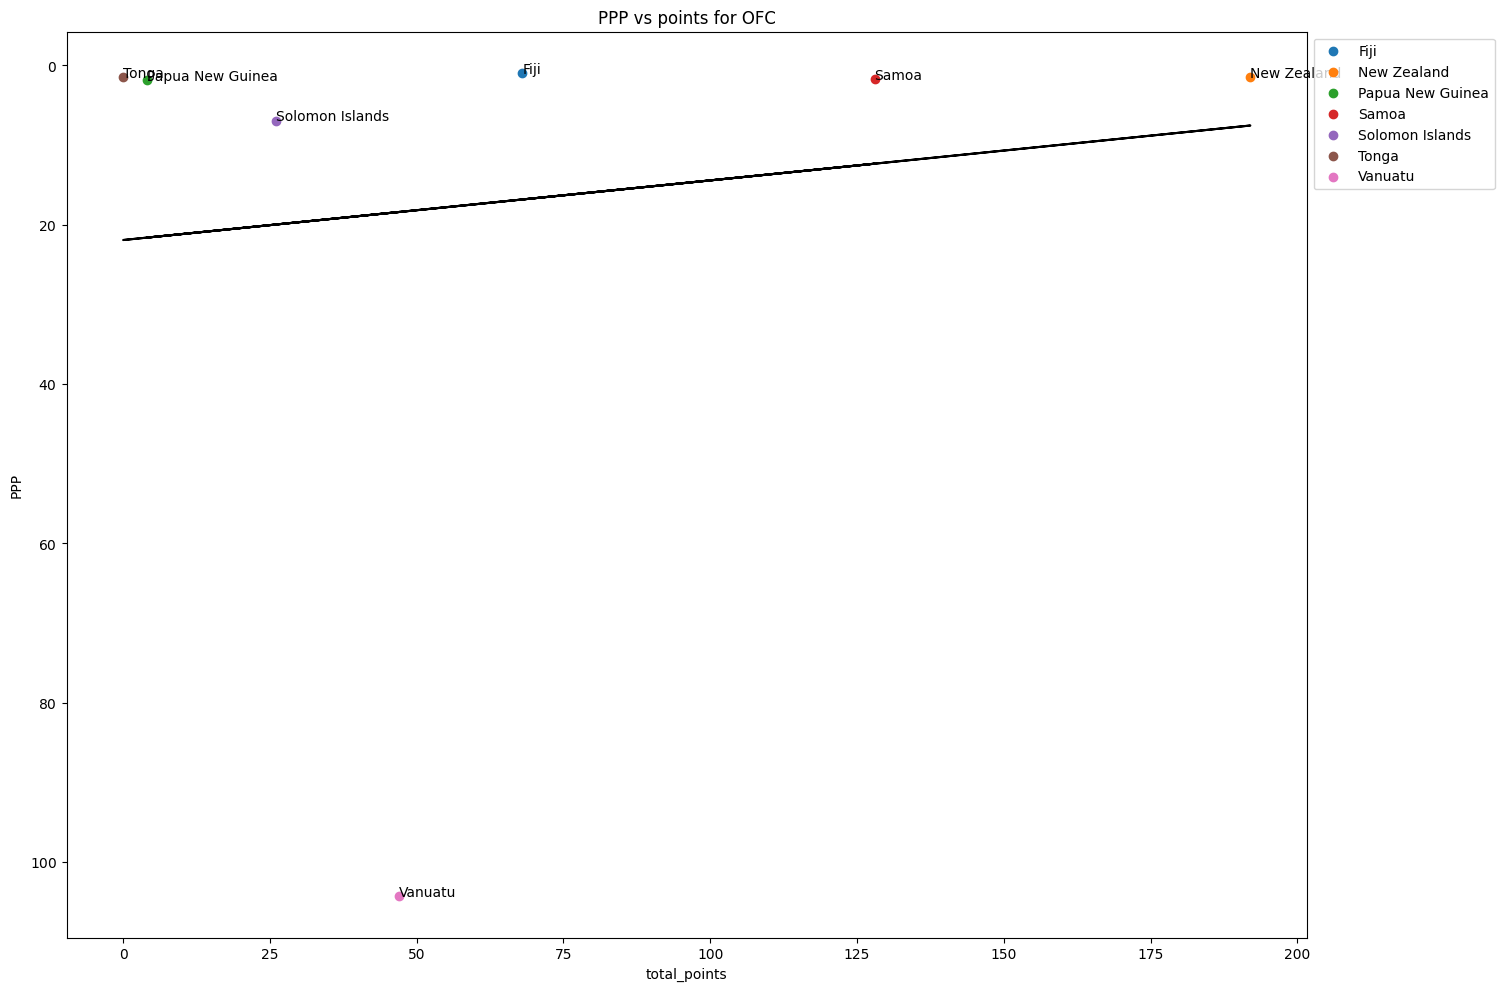

In [ ]:
markers = ['o', 's','p', 'P', 'x','X', 'v', '^', 'D', 'd', '1','2','3','4','8', '>', '<', 'h', 
           'H',4,5,6,7,8,9,10,11, '$A$', '$B$', '$C$', '$D$', '$E$', '$F$', '$G$', '$E$']

confederations = master_df['confederation'].drop_duplicates()

for confederation in confederations:
  #Create the plot and invert the x-axis so lesser value rankings are seen as
  #more preferable
  fig,ax = plt.subplots(figsize=(16,12), dpi= 100)
  #ax.invert_xaxis()
  ax.invert_yaxis()

  year_df = master_df.loc[master_df['confederation']==confederation]
  country_groups = year_df.groupby('Country Name')

  x_label = 'total_points'
  y_label = 'PPP'
  #for each team, plot the salary on y axis and year on x axis
  for name, group in country_groups:
      sm.OLS(group[x_label], group[y_label])
      #plot year on x axis, total payroll on y axis, choose a new marker from list of markers, set label as team
      plt.scatter(group[x_label], group[y_label], label = name)
      #set notation as scientific, use math text
      plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3), useMathText = True)
    
  for k, v in year_df.iterrows():
    plt.annotate(v['Country Name'], (v[x_label], v[y_label]))
    

  #Set the independent variable x to be the ranks of the countries in this 
  #confederation and dependent variable y to be GDPs of the countries in this 
  #confederation
  x = year_df[x_label]
  y = year_df[y_label]


  reg = sm.OLS(y, sm.add_constant(x)).fit()
  print('P value: ' + str(reg.pvalues[1]))
  #Calculate the linear regression of the variables using numpy, set the line's
  #equation, and plot it in black
  lin_reg = np.polyfit(x,y,1)
  slope = lin_reg[0]
  y_intercept = lin_reg[1]
  reg_line = slope*x + y_intercept
  plt.plot(x, reg_line, color="black")

  plt.title('PPP vs points for ' + confederation)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend(bbox_to_anchor=(1.0, 1.0))
  plt.show()

The scatter plots above plot PPP vs points for all countries, with plots seperated by their confederation. According to the p values, there is a insignificant correlation between PPP and points for all  confederations


To synthesize the above findings; 
GDP and GDP per capita had strong correlations with points for AFC

GDP had strong correlations with points for UEFA

Only GDP per capita had a strong correlation with points for CONMEBOL

PPP was insignificant for all confederations





**External Factors?**

Before plotting the individual confederations, the GDP and GDP-per-capita plot of all the countries might have led us to believe countries with higher values in both tend to have better performing national teams. However, now that we zoom in to the individual confederations, we see OFC, CONMEBOL, CONCACAF, and CAF do not have a low enough p-value to conclusively correlate with GDP and neither do OFC, CONCACAF, CAF, and UEFA correlate conclusively enough with GDP-per-capita. Thus, there must be another more signifigant factor at play we can search for.

To this end, we will examine the stability of each country. Our hypothesis is that, the more stable the livelihoods of the citizens of a country are, the more time some citizens might have to enjoy and develop in recreational activities like soccer. The best metric to measure this stability would be each country's fragility index.

####Fragility Index####


**Why fragility index?**


A country's Fragility Index is a measure aimed to assess their vulnerability to conflict or collapse based off certain factors (Brain drain, External intervention, etc). We chose this as a metric for a country's stability since, the higher the score, the less stable a country will be. A country's fragility index is calculated by a conflict assessment framework called CAST (Conflict Assessment System Tool) and detailed in the documentation in the following source:
https://fragilestatesindex.org/indicators/

Download the Fragility index excel file from here, open in any spreadsheet program, and click save as csv with the filename 'country_stability_2016.csv': https://fragilestatesindex.org/excel/


In [ ]:
#Read in the country stability index data from the file in this directory, drop
#all the irrelevant columns and rows
fragility_df_root = pd.read_csv("country_stability_2016.csv")
fragility_df = fragility_df_root.drop(columns=['C1: Security Apparatus',"C2: Factionalized Elites", "C3: Group Grievance", "E1: Economy", "E2: Economic Inequality",
                                          "E3: Human Flight and Brain Drain", "P1: State Legitimacy", "P2: Public Services", "P3: Human Rights", "S1: Demographic Pressures",
                                          "S2: Refugees and IDPs", "X1: External Intervention"])
fragility_df = fragility_df.drop(labels=range(178,len(fragility_df)), axis=0)
#Change the year column types to be integers and replace the Total column name
#to be "Stability_Index. Then, print the head"
fragility_df['Year'] = fragility_df['Year'].astype(int)
fragility_df.rename(columns={'Total':'fragility'}, inplace=True)
fragility_df.rename(columns={'Country':'Country Name'}, inplace=True)
fragility_df.head()

Country Name  Year Rank  fragility
0                   Somalia  2016  1st      114.0
1               South Sudan  2016  2nd      113.8
2  Central African Republic  2016  3rd      112.1
3                     Sudan  2016  4th      111.5
4                     Yemen  2016  4th      111.5

In [ ]:
master_df = master_df.merge(fragility_df, how='inner', on=['Country Name', 'Year'])
master_df.head()

id  rank         Country Name  ...    GDP_capita   Rank  fragility
0    20000   153          Afghanistan  ...    550.234626    9th      107.9
1    43932    38              Albania  ...   4124.982390  124th       61.2
2    43843    28              Algeria  ...   3922.160050   76th       78.3
3    43844   105               Angola  ...   3305.371054   37th       90.5
4  1882218    92  Antigua and Barbuda  ...  15446.853319  129th       56.2

[5 rows x 15 columns]

Make a scatter plot of each confederation's fragility score as opposed to their total FIFA points. Invert the fragility score axis so that lesser fragility indicies (higher stability) are shown as possitive ascension and plot a linear regression to show how the data trends. Likewise, print the resulting p-values of the regression for each plot to show if the countries' fragility index correlates with their total FIFA points within that confederation.

P value: 0.004762090342674282


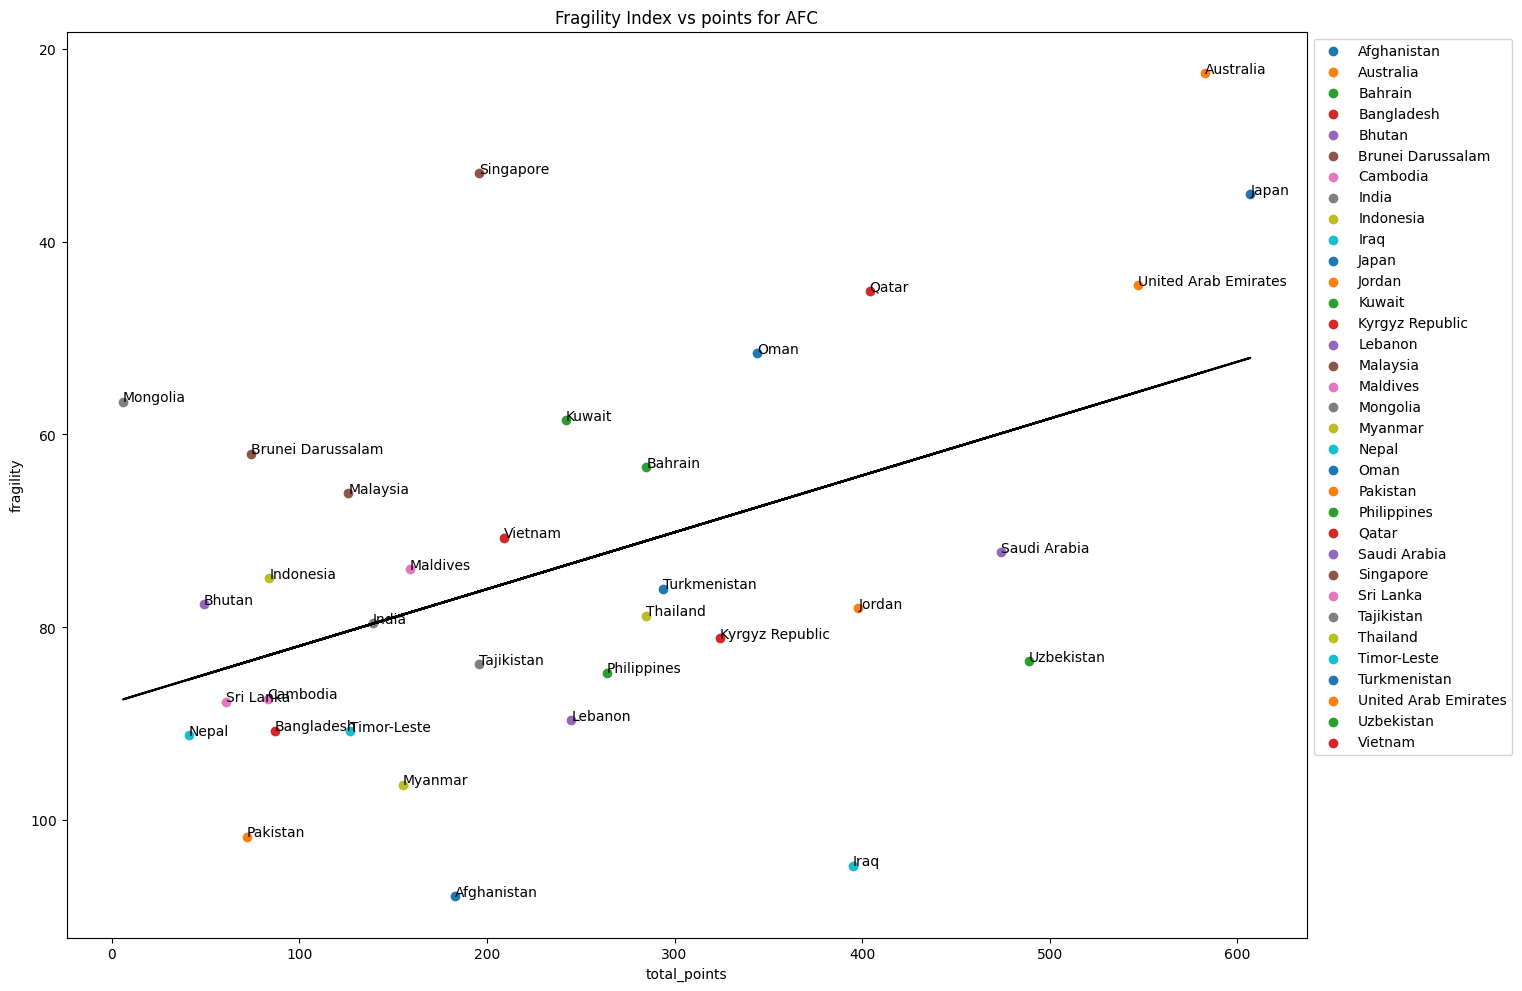

P value: 0.02057164340325089


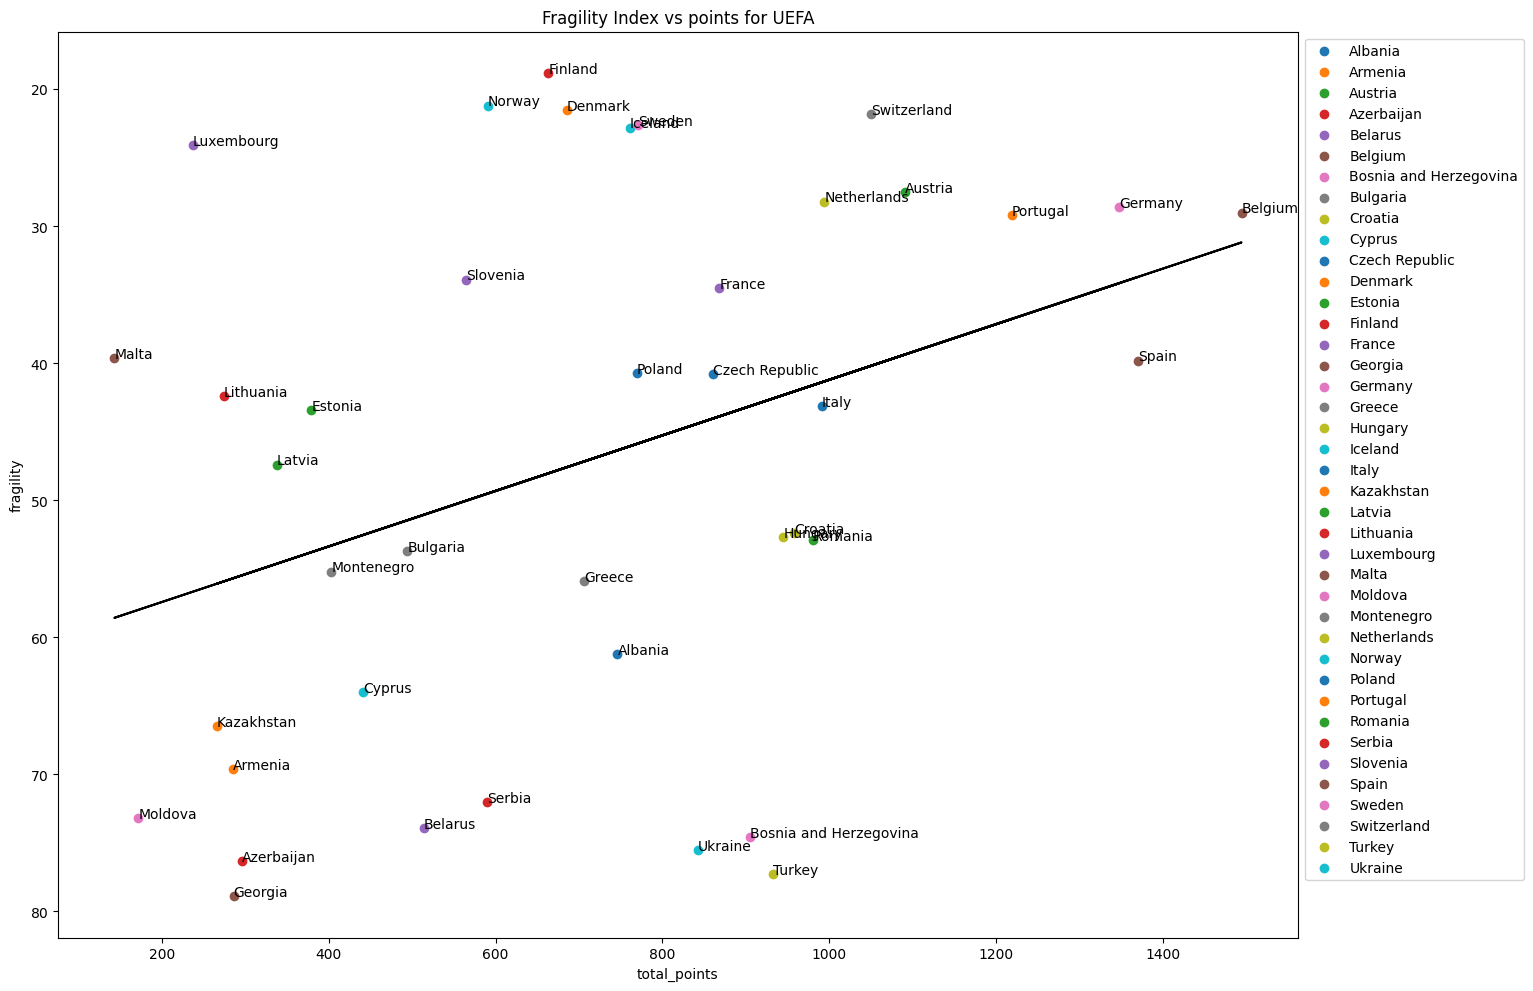

P value: 0.7584063816021708


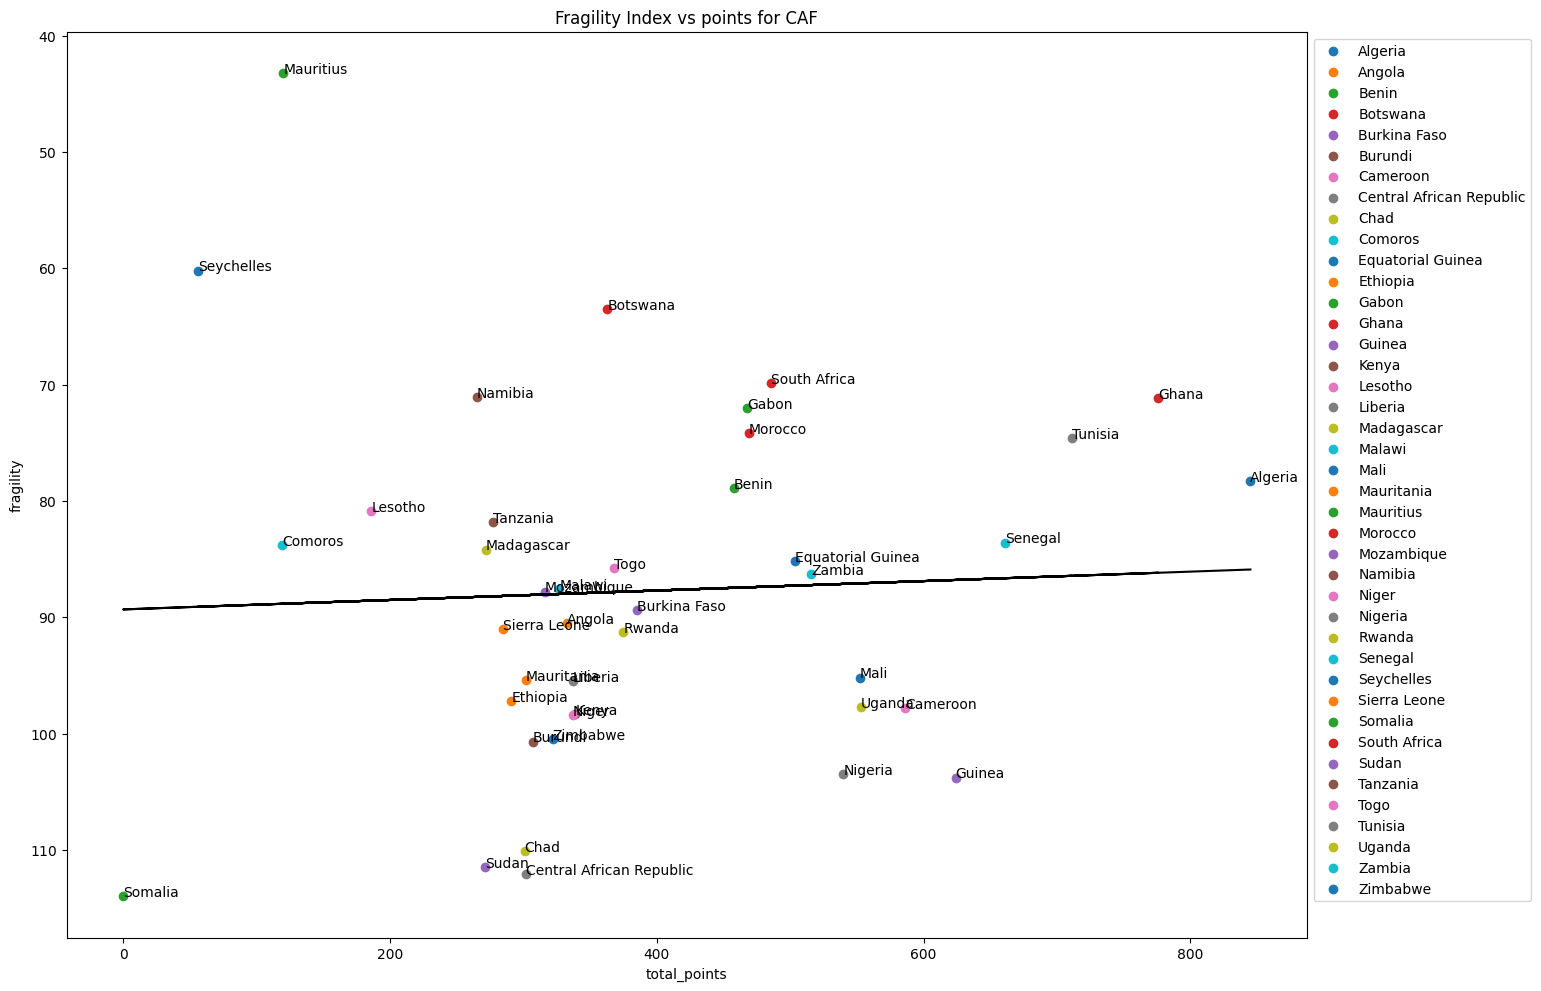

P value: 0.3138278202314517


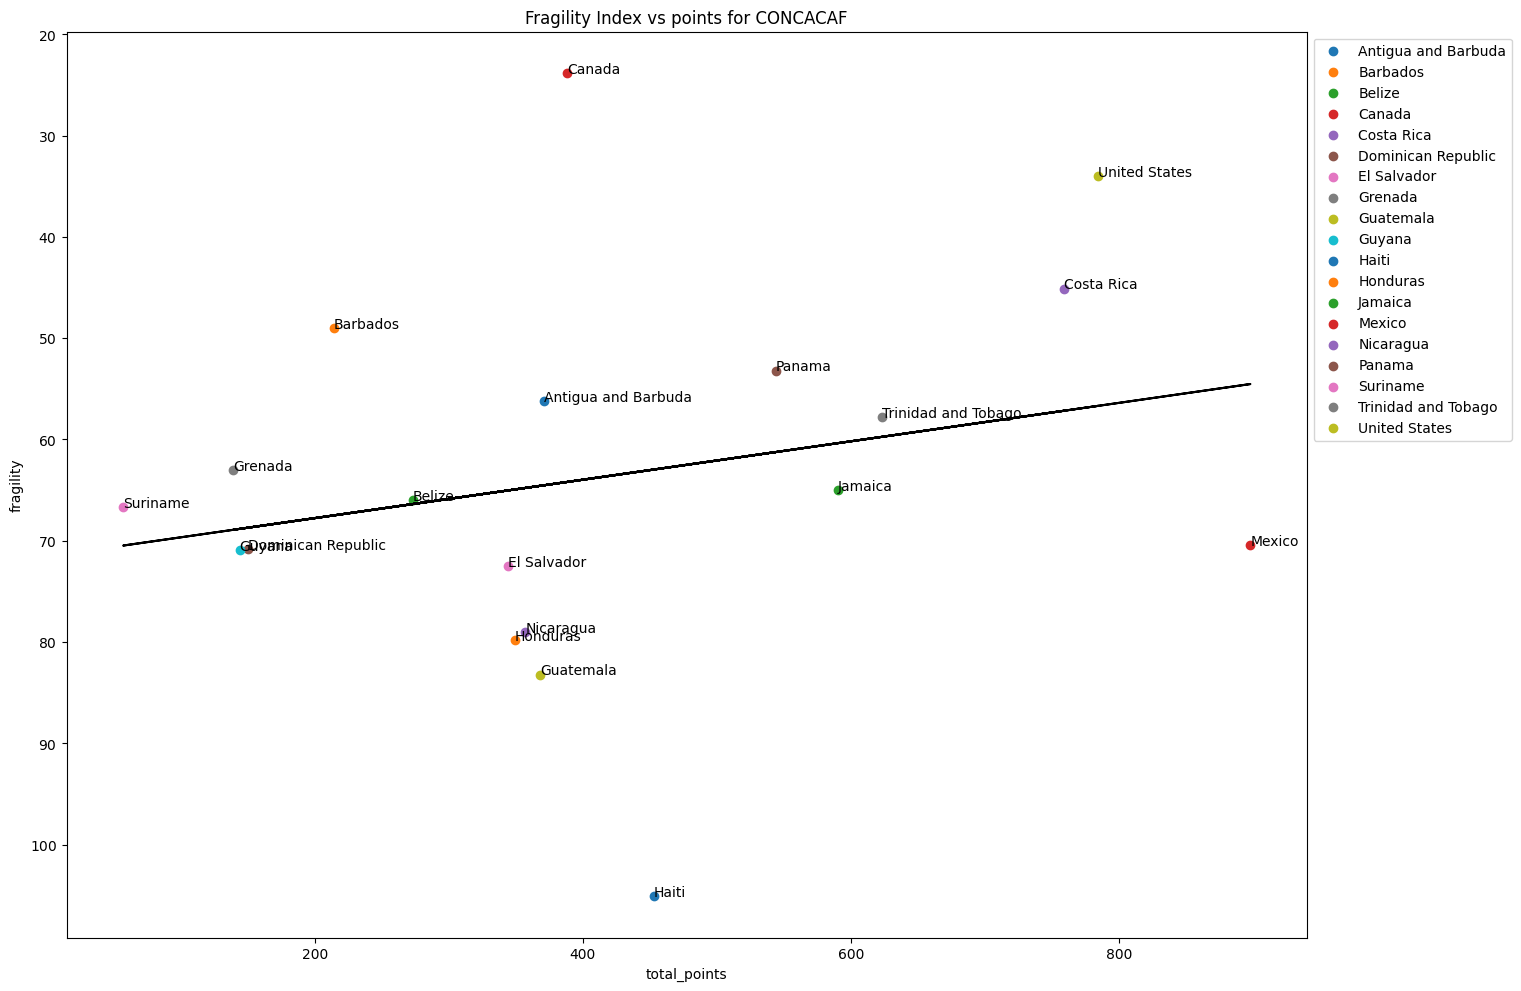

P value: 0.1380979183559405


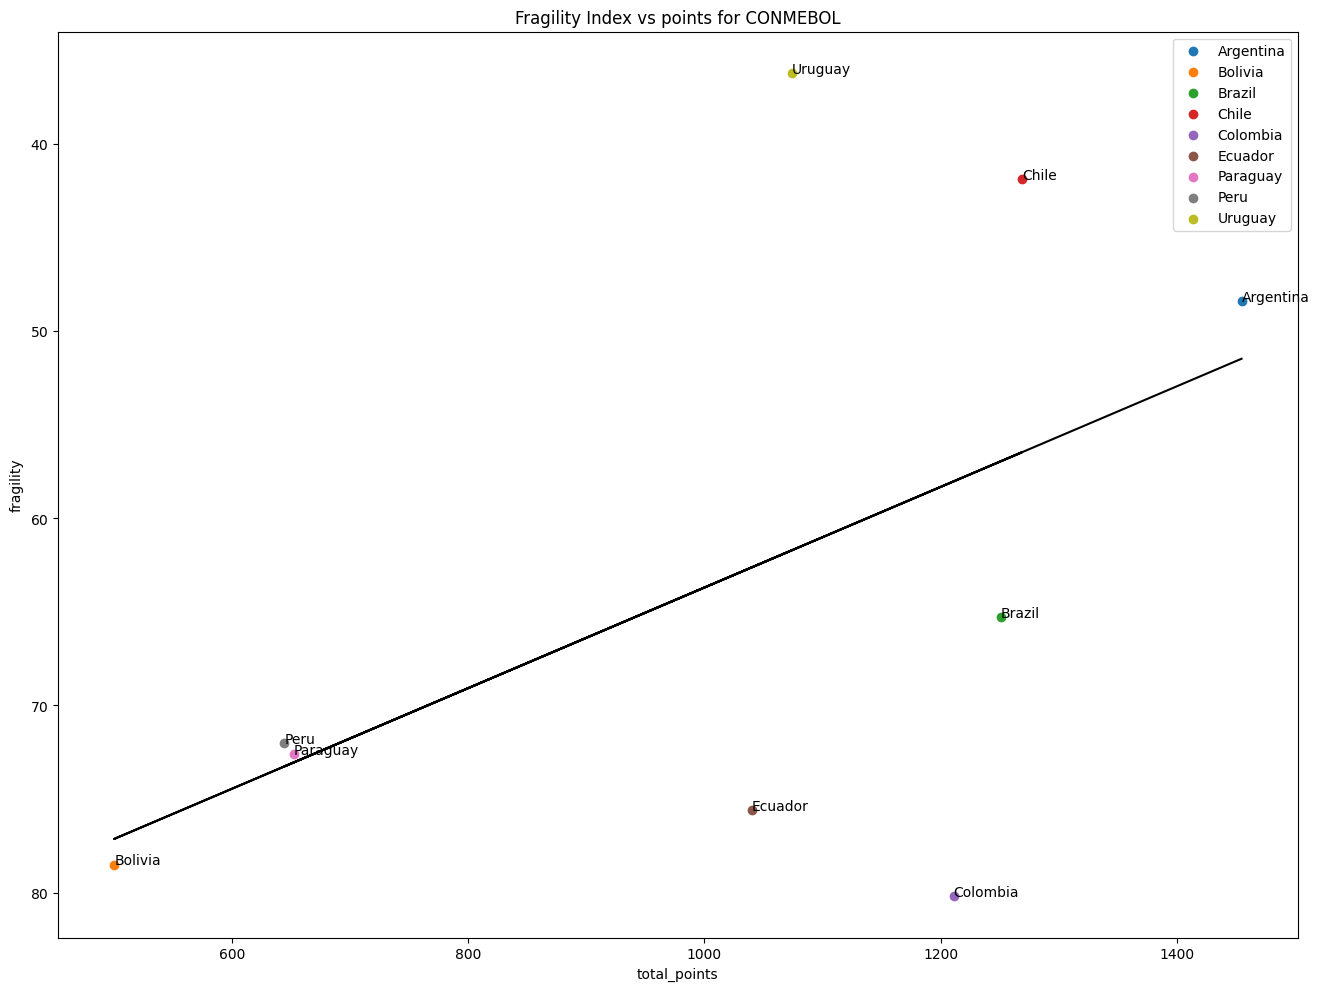

P value: 0.022709373026780114


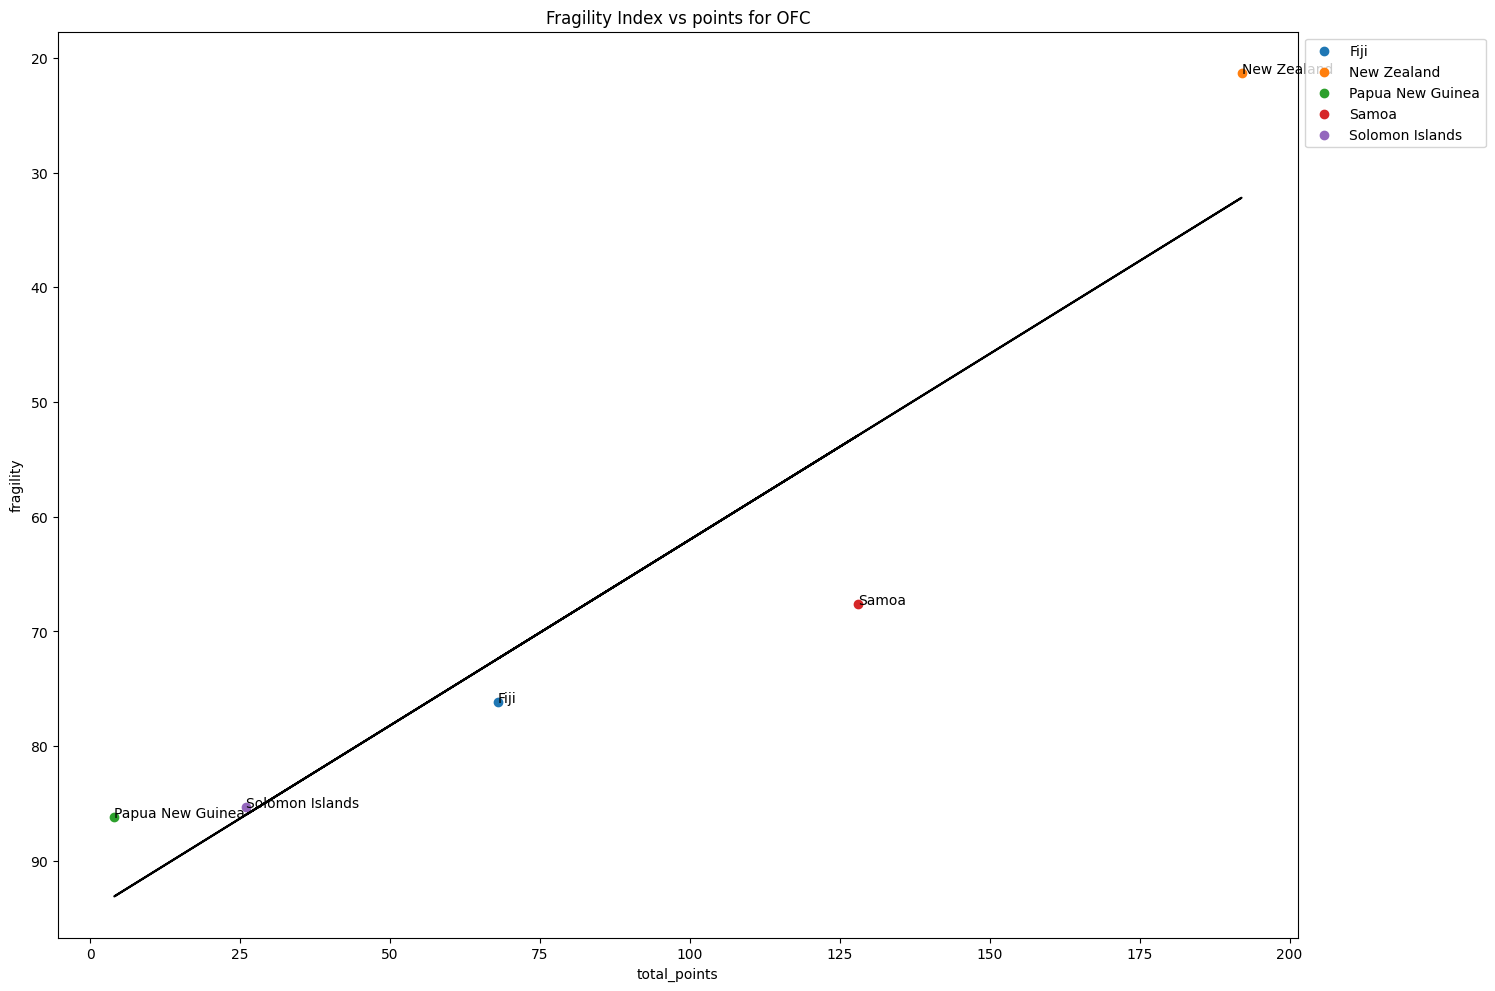

In [ ]:
markers = ['o', 's','p', 'P', 'x','X', 'v', '^', 'D', 'd', '1','2','3','4','8', '>', '<', 'h', 
           'H',4,5,6,7,8,9,10,11, '$A$', '$B$', '$C$', '$D$', '$E$', '$F$', '$G$', '$E$']

confederations = master_df['confederation'].drop_duplicates()
fragility_pvalues = []
for confederation in confederations:

    #Create the plot and invert the x-axis so lesser value rankings are seen as
    #more preferable
  fig,ax = plt.subplots(figsize=(16,12), dpi= 100)
  # ax.invert_xaxis()
  ax.invert_yaxis()

  #year_df=master_df
  year_df = master_df.loc[master_df['confederation']==confederation]

  country_groups = year_df.groupby('Country Name')

  x_label = 'total_points'
  y_label = 'fragility'
  #for each team, plot the salary on y axis and year on x axis
  for name, group in country_groups:
      sm.OLS(group[x_label], group[y_label])
      #plot year on x axis, total payroll on y axis, choose a new marker from list of markers, set label as team
      plt.scatter(group[x_label], group[y_label], label = name)
      #set notation as scientific, use math text
      plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3), useMathText = True)
    
  for k, v in year_df.iterrows():
    plt.annotate(v['Country Name'], (v[x_label], v[y_label]))
    

  #Set the independent variable x to be the ranks of the countries in this 
  #confederation and dependent variable y to be GDPs of the countries in this 
  #confederation
  x = year_df[x_label]
  y = year_df[y_label]


  reg = sm.OLS(y, sm.add_constant(x)).fit()
  print('P value: ' + str(reg.pvalues[1]))
  fragility_pvalues.append(confederation + ': ' + str(reg.pvalues[1]))

  #Calculate the linear regression of the variables using numpy, set the line's
  #equation, and plot it in black
  lin_reg = np.polyfit(x,y,1)
  slope = lin_reg[0]
  y_intercept = lin_reg[1]
  reg_line = slope*x + y_intercept
  plt.plot(x, reg_line, color="black")

  plt.title('Fragility Index vs points for ' + confederation)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend(bbox_to_anchor=(1.0, 1.0))
  plt.show()

The scatter plots above plot fragility index vs points for all countries, with plots seperated by their confederation. According to the p values, there is a significant correlation between the fragility index and points for the AFC, UEFA, CAF, CONCACAF, and OFC confederations, with only the CONMEBOL confederation having an insignificant correlation.


In [ ]:
heatmap_df=master_df[['total_points', 'GDP', 'Population', 'PPP', 'Rank', 'fragility',
       'GDP_capita']]
heatmap_df

total_points           GDP  Population  ...   Rank fragility    GDP_capita
0             183  1.946902e+10    35383128  ...    9th     107.9    550.234626
1             746  1.186387e+10     2876101  ...  124th      61.2   4124.982390
2             845  1.590491e+11    40551404  ...   76th      78.3   3922.160050
3             333  9.533511e+10    28842484  ...   37th      90.5   3305.371054
4             371  1.460145e+09       94527  ...  129th      56.2  15446.853319
..            ...           ...         ...  ...    ...       ...           ...
143          1074  5.241972e+10     3424132  ...  155th      36.2  15308.907692
144           489  6.722034e+10    31847900  ...   60th      83.5   2110.667754
145           209  2.052762e+11    93638724  ...  106th      70.7   2192.214539
146           516  2.106399e+10    16363507  ...   49th      86.3   1287.253990
147           322  1.661996e+10    14030390  ...   16th     100.5   1184.568669

[148 rows x 7 columns]

<function matplotlib.pyplot.show>

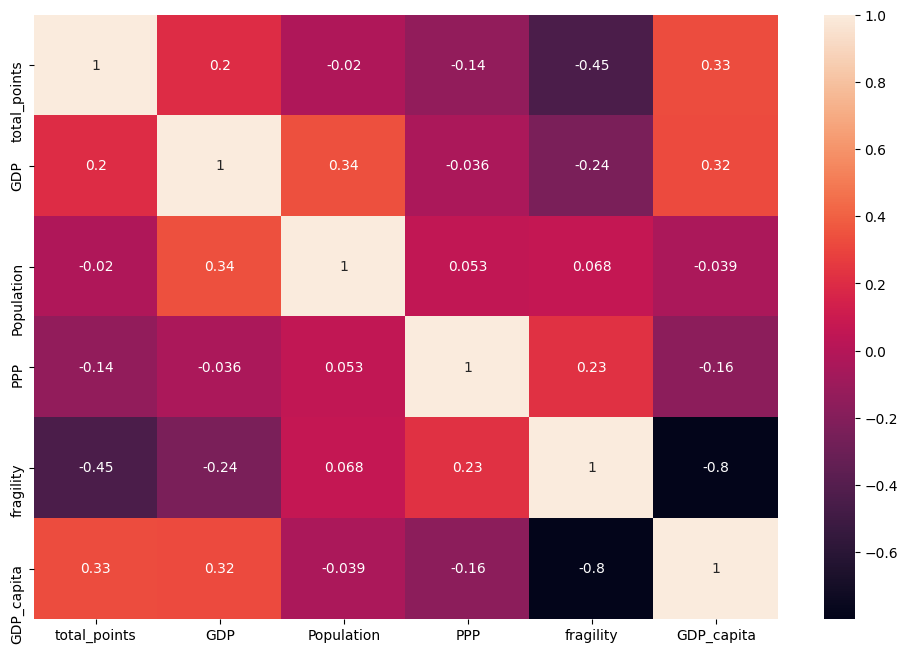

In [ ]:


fig,ax = plt.subplots(figsize=(12,8), dpi= 100)

corr=heatmap_df.corr()
sns.heatmap(corr, annot=True)
plt.show

The above heatmap visualizes the correelations between total poiints and fragility for all teams, with strong correlations having dark or light colorations, depending on the direction of the correlation. This verifies our observation made previous, that the fragility index has the most signficant correlation to total points of a soccer team, because fragility has the highest absolute value of all the other indicators when comparing with total points.

Our initial hypothesis has been almost completley rebuked, as GPD, GDP per capita, and PPP have proven to be largely insignificant. However, fragility index appears to have some signficance, so it may be worthwhile to investigate this aspect further. The fragility index is an index, meaning it is comprised of multiple other micro-indicators, so by comparing these micro-indicators with total points, we could isolate the specific indicators that yield the best correlation with total points. 

In [ ]:
fragility_heatmap_df = fragility_df_root[['Country','Total', 'C1: Security Apparatus',"C2: Factionalized Elites", "C3: Group Grievance", "E1: Economy", "E2: Economic Inequality",
                                          "E3: Human Flight and Brain Drain", "P1: State Legitimacy", "P2: Public Services", "P3: Human Rights", "S1: Demographic Pressures",
                                          "S2: Refugees and IDPs", "X1: External Intervention"]]

fragility_heatmap_df.rename(columns={'Country':'Country Name'}, inplace=True)
fragility_heatmap_df = fragility_heatmap_df.merge(master_df[['Country Name','total_points']], how='inner', on=['Country Name'])
fragility_heatmap_df
                               

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country Name  Total  ...  X1: External Intervention  total_points
0                     Somalia  114.0  ...                        9.5             0
1    Central African Republic  112.1  ...                        9.5           302
2                       Sudan  111.5  ...                        9.9           271
3                        Chad  110.1  ...                        8.5           301
4                 Afghanistan  107.9  ...                        9.9           183
..                        ...    ...  ...                        ...           ...
143               Switzerland   21.8  ...                        1.0          1050
144                   Denmark   21.5  ...                        1.1           685
145               New Zealand   21.3  ...                        0.9           192
146                    Norway   21.2  ...                        1.5           591
147                   Finland   18.8  ...                        1.0           663

[148 rows x 15 columns]

To quickly visualize the correlations between all of the micro-indicators of the Fragility index with total points, we will utilize a heatmap. 

<function matplotlib.pyplot.show>

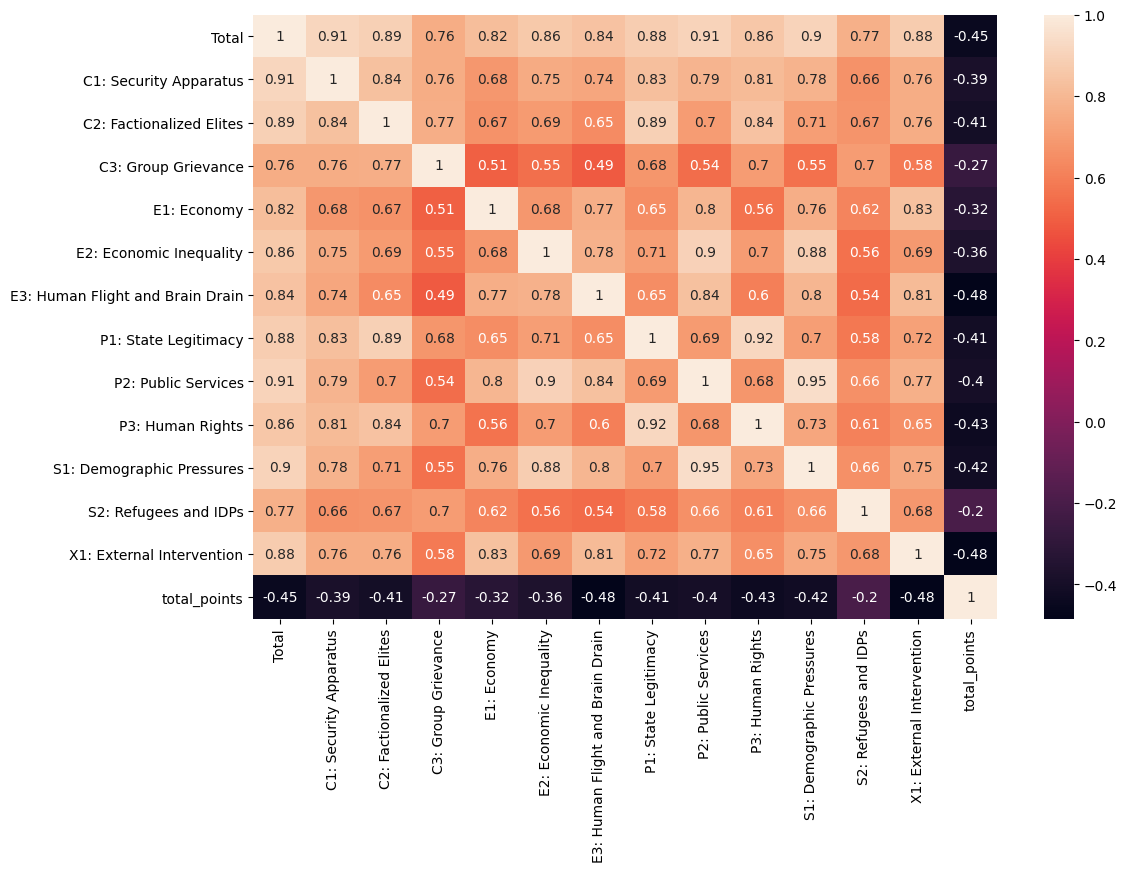

In [ ]:
fig,ax = plt.subplots(figsize=(12,8), dpi= 100)

corr=fragility_heatmap_df.corr()
sns.heatmap(corr, annot=True)
plt.show

In [ ]:
for i in master_df.columns:
  if i == 'fragility':
    print('\n'+i)
    x = master_df['total_points']
    y = master_df[i]
    reg = sm.OLS(y, sm.add_constant(x)).fit()
    print(reg.pvalues)


fragility
const           2.348571e-59
total_points    1.247753e-08
dtype: float64


This heatmap shows the 2 indicators that best correlate with total FIFA ranking points is X1: External Intervention and E3: Human flight and Brain Drain. Both have a coefficient of -0.48, which when calculating as absolute value is .03 higher than the baseline coefficient of -0.45. Therefore, these 2 indicators should result in a better correlation with total points than just using fragility index. 

In [ ]:
for i in fragility_heatmap_df.columns:
  if i != 'Country Name':
    print('\n'+i)
    x = fragility_heatmap_df['total_points']
    y = fragility_heatmap_df[i]

    reg = sm.OLS(y, sm.add_constant(x)).fit()
    print(reg.pvalues)


Total
const           2.348571e-59
total_points    1.247753e-08
dtype: float64

C1: Security Apparatus
const           2.252684e-48
total_points    1.330899e-06
dtype: float64

C2: Factionalized Elites
const           7.890897e-53
total_points    2.509815e-07
dtype: float64

C3: Group Grievance
const           4.166836e-56
total_points    1.131515e-03
dtype: float64

E1: Economy
const           1.795711e-56
total_points    5.831602e-05
dtype: float64

E2: Economic Inequality
const           4.708398e-54
total_points    5.615439e-06
dtype: float64

E3: Human Flight and Brain Drain
const           2.973784e-54
total_points    5.940894e-10
dtype: float64

P1: State Legitimacy
const           5.382668e-49
total_points    2.038916e-07
dtype: float64

P2: Public Services
const           5.717766e-44
total_points    5.367091e-07
dtype: float64

P3: Human Rights
const           2.966822e-50
total_points    3.592877e-08
dtype: float64

S1: Demographic Pressures
const           7.569971e-50
tot

The p values above all confirm what we found in the heatmap; X1: External Intervention and E3: Human flight and Brain Drain have the strongest correlation with total points. However,  E3: Human flight and Brain Drain has a lower p-value and therefore stronger correlation than X1: External Intervention, therefore E3 should be the canidate for further examination to see if it can be a better indicator than Fragility index itself. 

#### BRAIN DRAIN ####


"E3: Human flight and Brain Drain" is defined as the emigration of the  economically productive populations of a country due to economic deterioration in their home country and the hope of better opportunities afar. Merge this information into the table using the same function as before and display the head of the table to show the change.


In [ ]:
#Add E3: Human flight and Brain Drain to master_df as E3 Brain drain
master_df = master_df.merge(fragility_heatmap_df[['E3: Human Flight and Brain Drain', 'Country Name']], how='inner', on=['Country Name'])
master_df = master_df.rename(columns={"E3: Human Flight and Brain Drain": "E3 Brain Drain"})
master_df = master_df.loc[:,~master_df.columns.duplicated()]

master_df.head()


id  rank         Country Name  ...   Rank  fragility  E3 Brain Drain
0    20000   153          Afghanistan  ...    9th      107.9             8.4
1    43932    38              Albania  ...  124th       61.2             7.6
2    43843    28              Algeria  ...   76th       78.3             5.4
3    43844   105               Angola  ...   37th       90.5             6.3
4  1882218    92  Antigua and Barbuda  ...  129th       56.2             7.0

[5 rows x 16 columns]

We will analyze the Brain Drain indicator as we have analyzed our previous indicators, with a linear regression seperated for all confederations, so our analysis is methodically consistent and we are not introducing any new regressional skews.

P value: 0.00045001244547100255


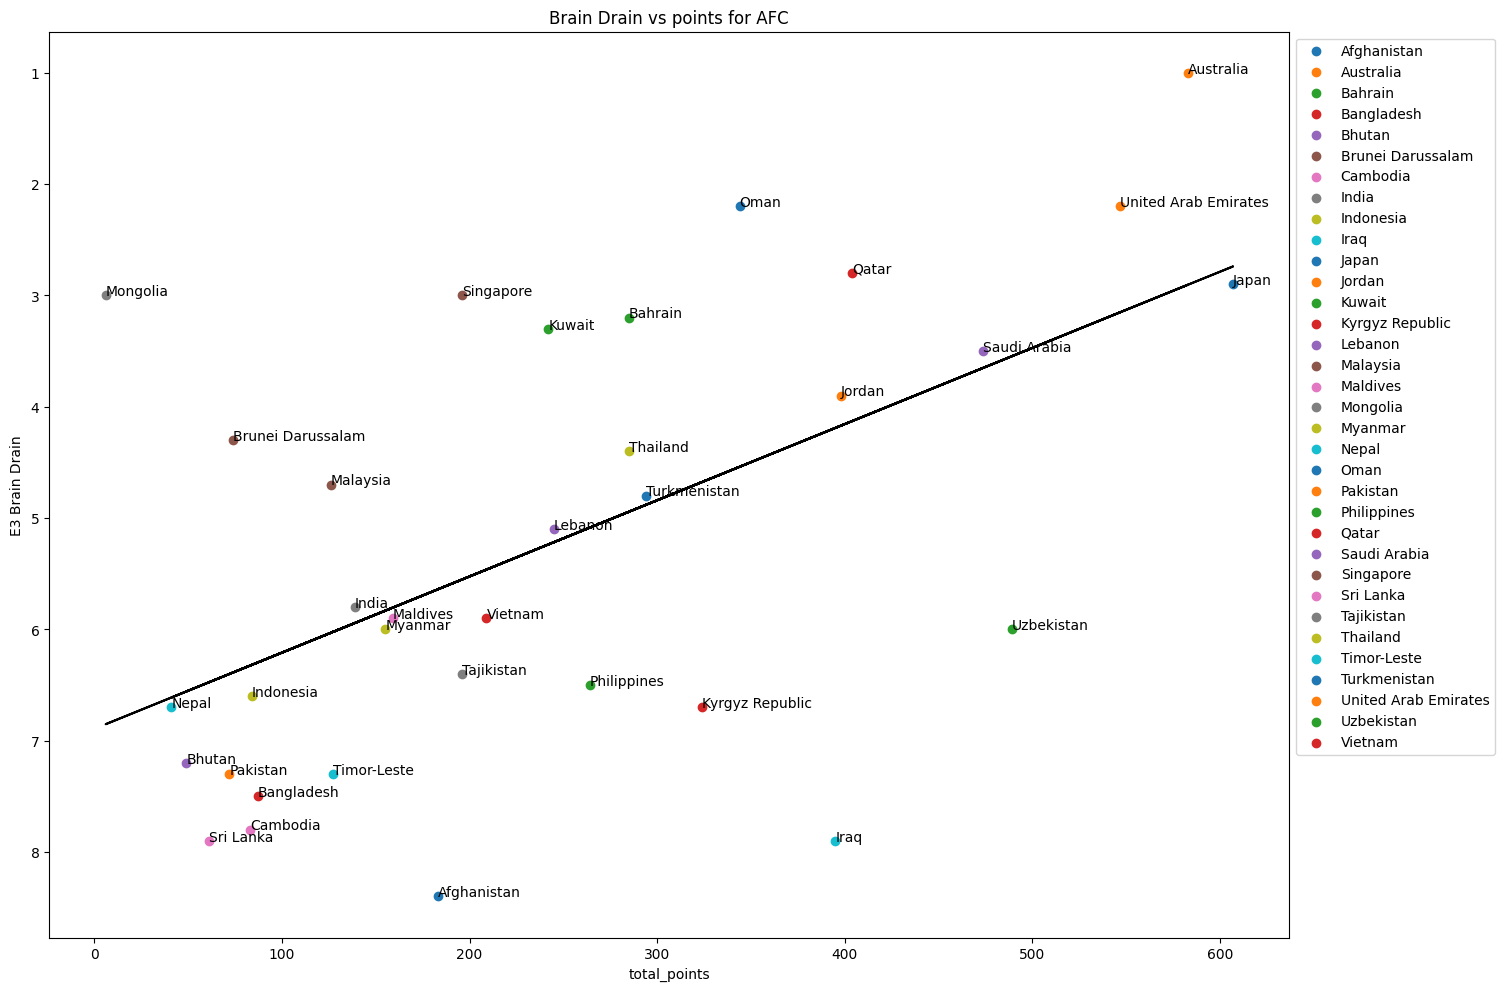

P value: 0.003015223213035053


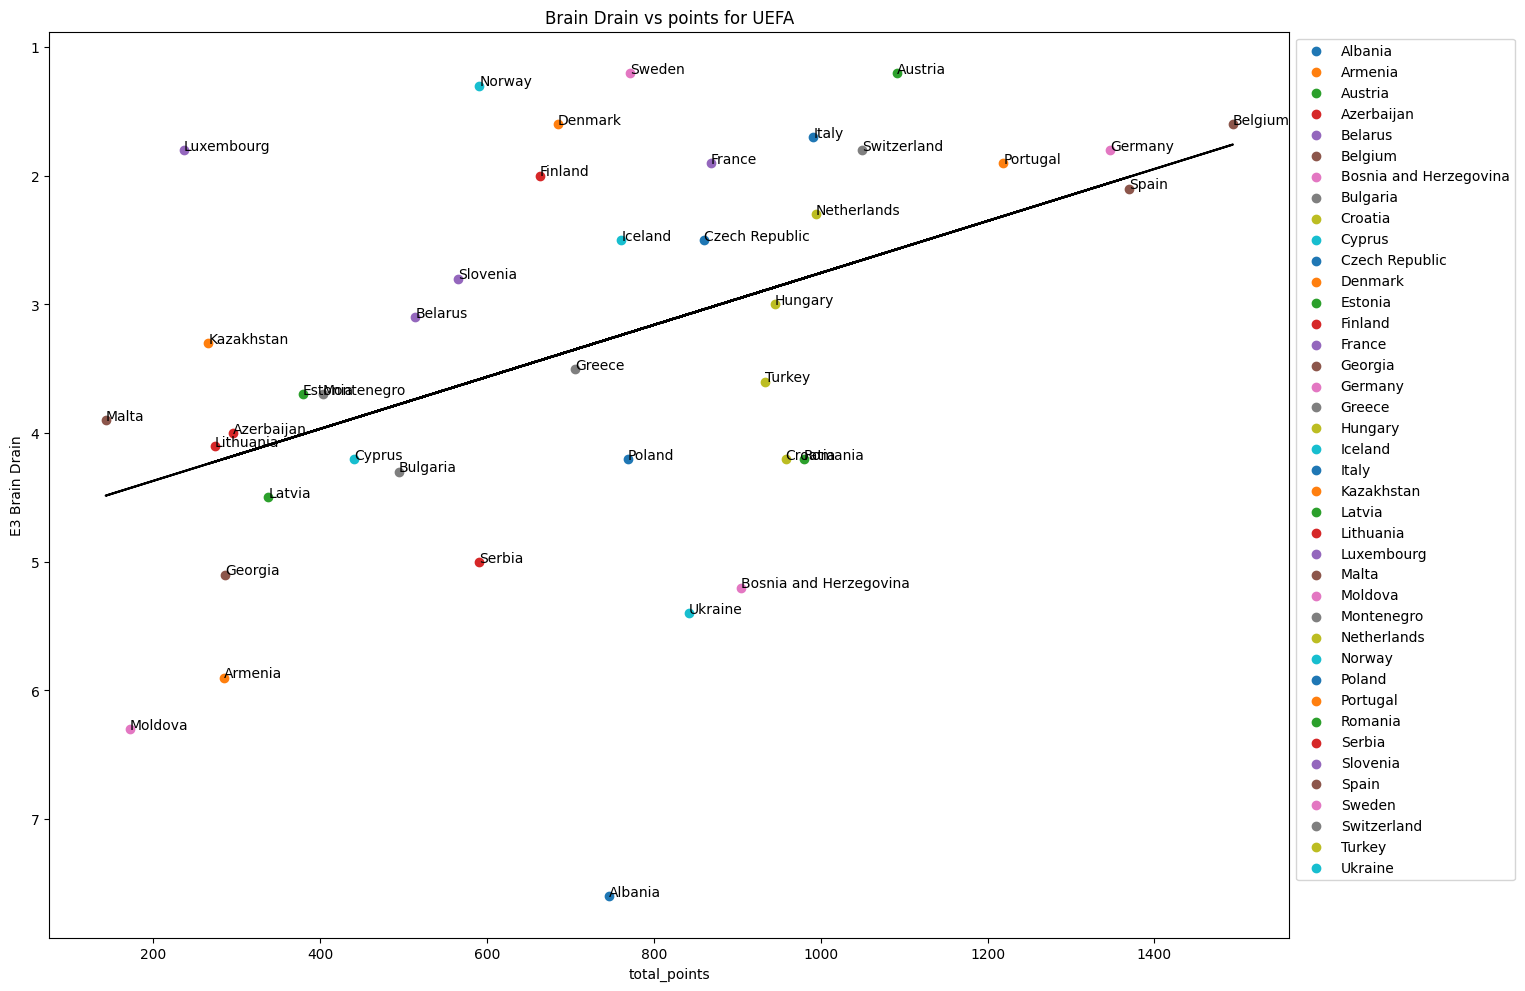

P value: 0.5770920457897208


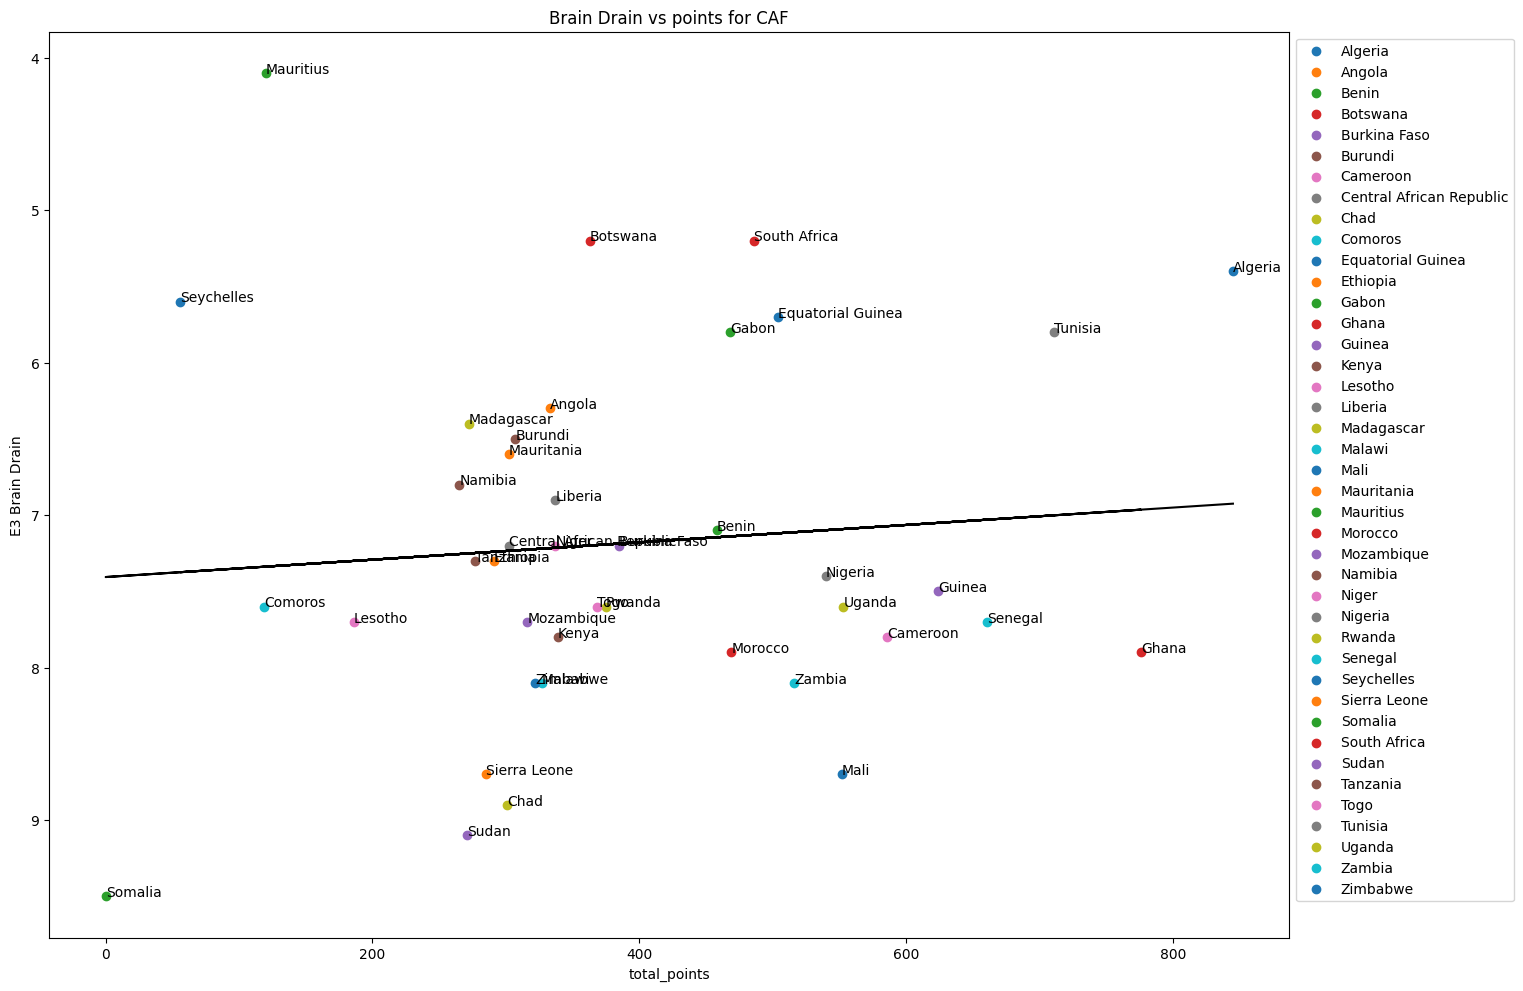

P value: 0.040092416701095875


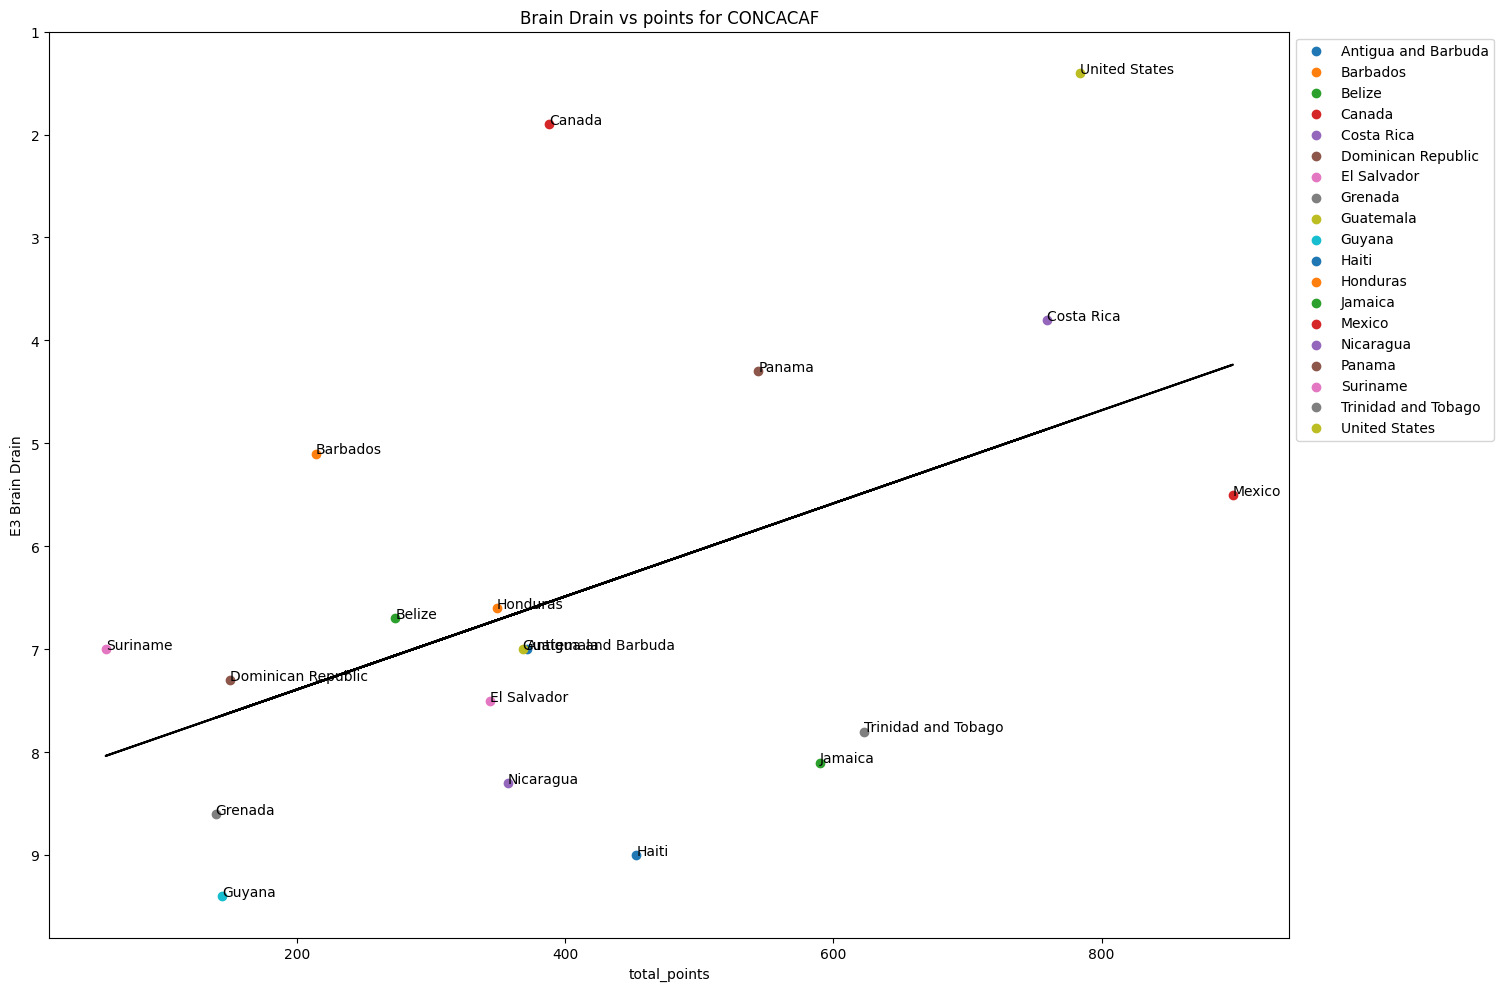

P value: 0.014485120861425685


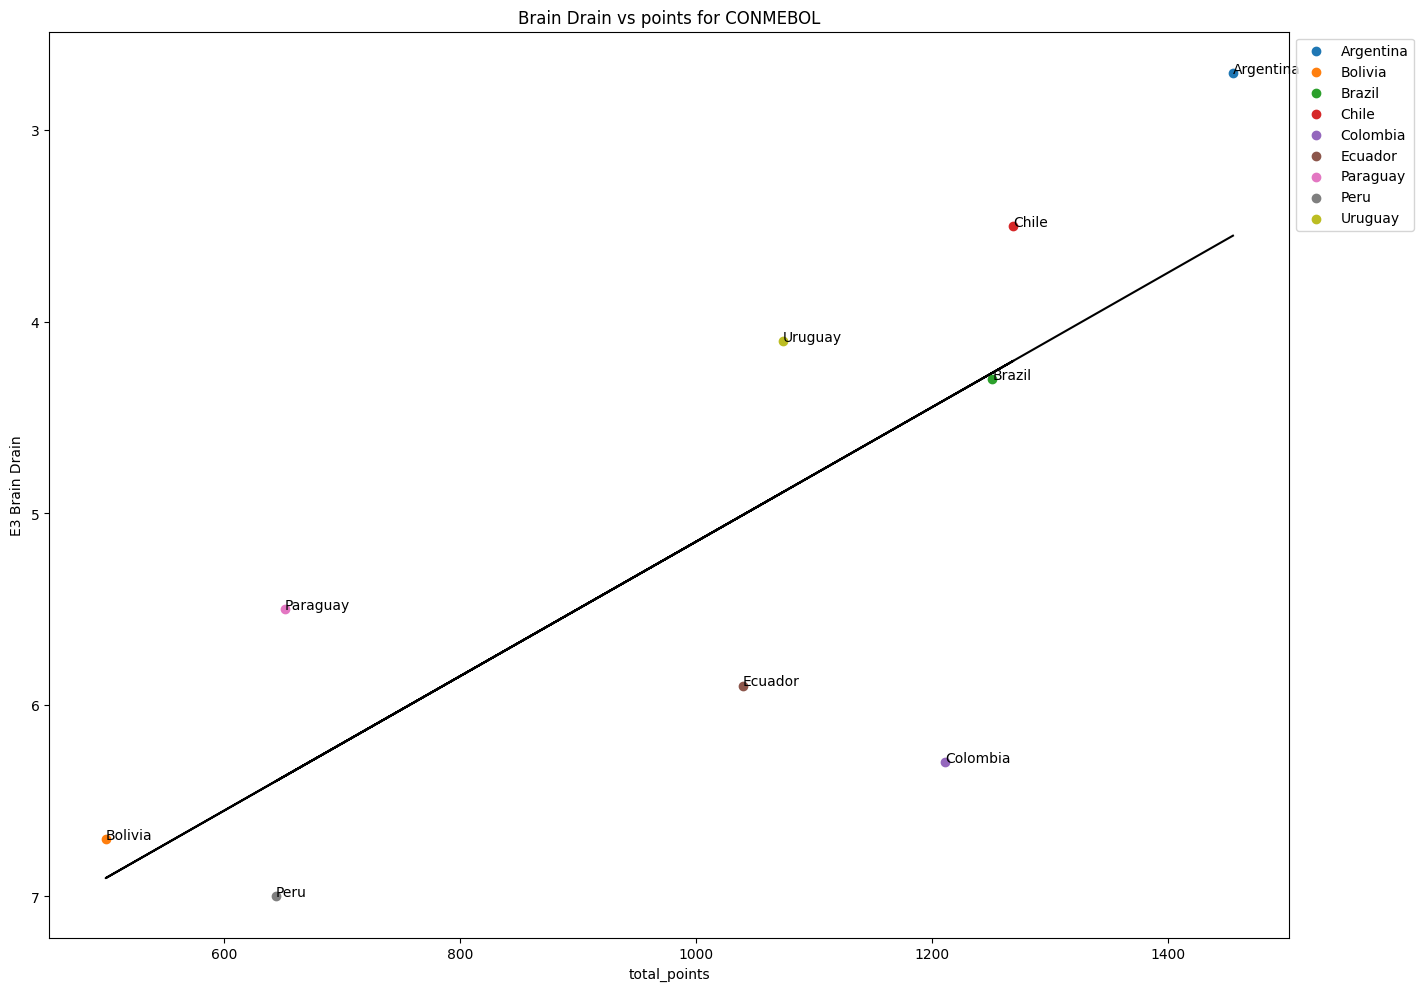

P value: 0.3250080901749106


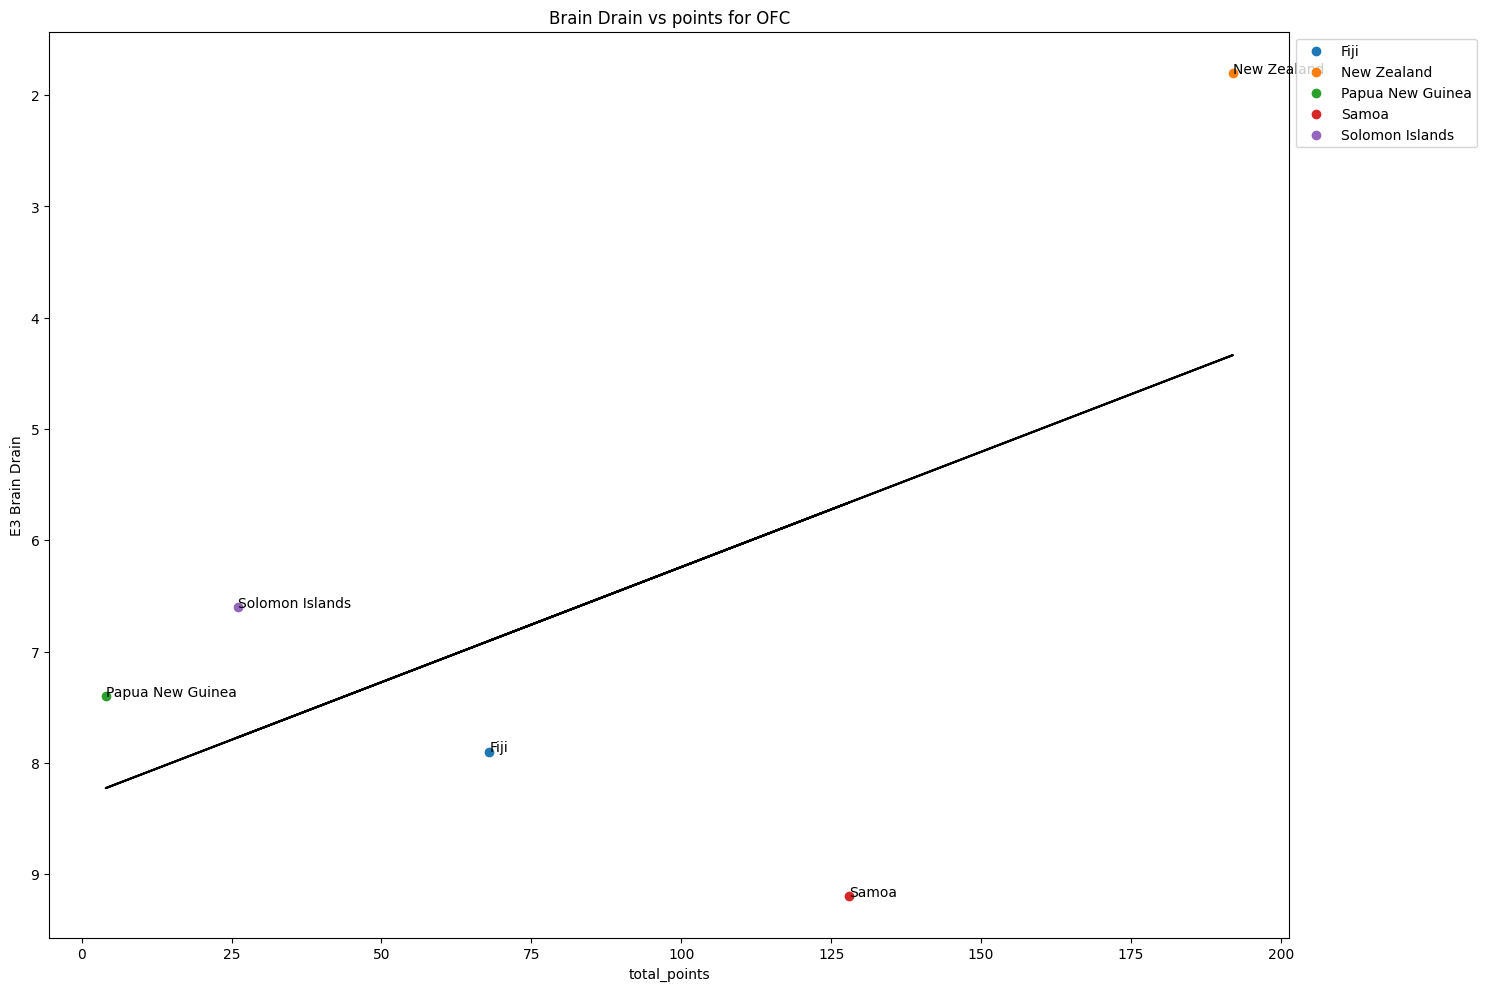

In [ ]:
markers = ['o', 's','p', 'P', 'x','X', 'v', '^', 'D', 'd', '1','2','3','4','8', '>', '<', 'h', 
           'H',4,5,6,7,8,9,10,11, '$A$', '$B$', '$C$', '$D$', '$E$', '$F$', '$G$', '$E$']

confederations = master_df['confederation'].drop_duplicates()

e3_pvalues = []
for confederation in confederations:

    #Create the plot and invert the x-axis so lesser value rankings are seen as
    #more preferable
  fig,ax = plt.subplots(figsize=(16,12), dpi= 100)
  # ax.invert_xaxis()
  ax.invert_yaxis()

  #year_df=master_df
  year_df = master_df.loc[master_df['confederation']==confederation]

  country_groups = year_df.groupby('Country Name')

  x_label = 'total_points'
  y_label = 'E3 Brain Drain'
  #for each team, plot the salary on y axis and year on x axis
  for name, group in country_groups:
      sm.OLS(group[x_label], group[y_label])
      #plot year on x axis, total payroll on y axis, choose a new marker from list of markers, set label as team
      plt.scatter(group[x_label], group[y_label], label = name)
      #set notation as scientific, use math text
      plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3), useMathText = True)
    
  for k, v in year_df.iterrows():
    plt.annotate(v['Country Name'], (v[x_label], v[y_label]))
    

  #Set the independent variable x to be the ranks of the countries in this 
  #confederation and dependent variable y to be GDPs of the countries in this 
  #confederation
  x = year_df[x_label]
  y = year_df[y_label]


  reg = sm.OLS(y, sm.add_constant(x)).fit()
  print('P value: ' + str(reg.pvalues[1]))
  e3_pvalues.append(confederation + ': ' + str(reg.pvalues[1]))
  #Calculate the linear regression of the variables using numpy, set the line's
  #equation, and plot it in black
  lin_reg = np.polyfit(x,y,1)
  slope = lin_reg[0]
  y_intercept = lin_reg[1]
  reg_line = slope*x + y_intercept
  plt.plot(x, reg_line, color="black")

  plt.title('Brain Drain vs points for ' + confederation)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend(bbox_to_anchor=(1.0, 1.0))
  plt.show()

According to the above graphs and their p-values, Brain Drain the greatest signficance to the countries of all confederations except OFC. And since OFC consists of fewer representative nations as CONMEBOL, it would be considered a better overall indicator that the correlation increases for all other confederations despite the drawback in this confederation.

In [ ]:
cnt=0
for i in e3_pvalues:
  print('Brain Drain p value')
  print(i)
  print('Fragility Index p value')
  print(fragility_pvalues[cnt])
  print()
  cnt+=1

Brain Drain p value
AFC: 0.00045001244547100255
Fragility Index p value
AFC: 0.004762090342674282

Brain Drain p value
UEFA: 0.003015223213035053
Fragility Index p value
UEFA: 0.02057164340325089

Brain Drain p value
CAF: 0.5770920457897208
Fragility Index p value
CAF: 0.7584063816021708

Brain Drain p value
CONCACAF: 0.040092416701095875
Fragility Index p value
CONCACAF: 0.3138278202314517

Brain Drain p value
CONMEBOL: 0.014485120861425685
Fragility Index p value
CONMEBOL: 0.1380979183559405

Brain Drain p value
OFC: 0.3250080901749106
Fragility Index p value
OFC: 0.022709373026780114



Comparing our p values shows that Brain Drain has increased accuracy for the UEFA, CONCACAF, and CONMEBOL, and has decreased accuracy for AFC and OFC. The decrease in accuracy for AFC and increase for UEFA, CAF, and CONCACAF is negligable, because all of their p values are very close to 0 regardless. CONMEBOL has become signficantly more accurate, as the p value has went from 0.138098, an insignificant value, to 0.014485, a signficant value. Contrastingly, the p values for OFC  went from 0.022709 to 0.325008, losing its significance. 

####Conclusions####

**Takeaways:**



*   PPP (Purchasing Power Parity) is not a signifigant  indicator of a country's national team performances at any level (global or regional).
*   The GDP (Gross Domestic Product) and GDP per capita of a country are possitively correlated with their men's national team performances at a global level, but inconsistent at a regional level.
*   The fragility index of a country is a signifigant indicator of a negative correlation between a country's instability and their men's national team's performance (and conversely, a possitive correlation between a country's stability and performance) for all confederations other than CONMEBOL.
*   The Brain Drain of a country is comparatively the most signifigant indicator of a negative correlation between itself and the performance of that country's national team across all confederations aside from the outlier OFC confederation.



**Future Possibilities**

The analytic method we used to quantify the signficance of an indicator was rather simple; Isolate the variable to its own column, compare the variable against the potential dependent variable via a linear regression, and check the significance with p-value. We were consistent with our methodolgy, which limits the extent of unnecassary skews due to a change in analytic approach. And even though we didnt find a definitive set of indicators that could correlate to a country's football performance, we havent analyzed everything. There are many other factors, from climate conditions to government spending breakdowns that could be attributed to football performance. Additionally, there are many other models that could yield better predictions than a linear regression, such as a polynomial regression, SVM, or even a neural network. As a final takeaway, this tutorial is a mere stepping stone to the wide range of analytical approaches one could take to explain what aspects of a country most influences its professional football performace.  
